<a href="https://www.kaggle.com/code/mesutssmn/telco-churn-analysis?scriptVersionId=186604232" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div style="border-radius: 40px; border: #5E5772 solid; padding: 12px; background-color: #3383; font-size: 150%; text-align: left;">

<h3 align="center"><font color='#300000'size=10%>TELCO CHURN ANALYSIS</font></h3>

<h4 align="left"><font color='#30000' size=5%>To Do :</font></h4>
    
<li> Cleaning dataset for classification</li>
    
<li> Some analysis and statistics</li>
    
<li> ML, ANN
    
    

<h3 align="left"><font color='#300000' size=5%>ABOUT DATA:</font></h3>

The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index.

For more details: https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113
    

<div style="border-radius: 10px; overflow: hidden; text-align: center;">
    <img src="https://miro.medium.com/v2/resize:fit:1358/0*8Iu_eymr6eR-YuQw" alt="Churn" width="900"></div>

<div style="border-radius: 10px; overflow: hidden; text-align: left;">
    <img src="https://miro.medium.com/v2/resize:fit:1000/1*n_0BmJJ8nRLLTI_POtfCBg.png" alt="Churn" width="900"></div>
</div>

   ##### Thank you for taking the time to read. Please don't ignore voting.


# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #3383; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> LINKS </div>

#### **Name :** Mesut Suhan Şişman

<div style="text-align: left;">
    <table>
        <tr>
            <th><b>Links</b></th>
        </tr>
        <tr>
        </tr>
        <tr>
            <td>GitHub</td>
            <td><a href="https://github.com/Mesutssmn"><img src="https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github" alt="GitHub"/></a></td>
        </tr>
        <tr>
            <td>LinkedIn</td>
            <td><a href="https://www.linkedin.com/in/mesut-suhan-sisman/"><img src="https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin" alt="LinkedIn"/></a></td>
        </tr>
        <tr>
        </tr>
        <tr>
    </table>

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #3383; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> IMPORTS </div>

In [1]:
# Base Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis Libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from scipy.stats import shapiro, levene, kruskal, ttest_ind, f_oneway
from tabulate import tabulate

# Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

#Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

import warnings
warnings.filterwarnings("ignore")

2024-07-03 01:15:17.197854: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-03 01:15:17.197992: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-03 01:15:17.365922: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 55)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #3383; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> LOADING DATA </div>

In [3]:
df_ = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df = df_.copy()
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check          29.850        29.85   
1               No               Mailed check          56.950       1889.5   
2              Yes               Mailed check          53.850       108.15   
3               No  Bank transfer (automatic)          42.300      1840.75   
4              Yes           Electronic check          70.700       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #3383; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> FEATURES </div>

**customerID:** Unique customer identifier.

**gender:** Customer's gender .

**SeniorCitizen:** Indicates if the customer is 65 or older: Yes, No

**Partner:** Indicates if customer has a partner .

**Dependents:** Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

**tenure:** Number of months with the company.

**PhoneService:** Indicates if the customer subscribes to home phone service with the company: Yes, No

**MultipleLines:** Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

**InternetService:**  Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

**OnlineSecurity:**  Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

**OnlineBackup:** Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

**DeviceProtection:** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

**TechSupport:** Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

**StreamingTV:** Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**StreamingMovies:** Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Contract:** Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

**PaperlessBilling:** Indicates if the customer has chosen paperless billing: Yes, No

**PaymentMethod:** Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

**MonthlyCharges:** Indicates the customer’s current total monthly charge for all their services from the company.

**TotalCharges:** Indicates the customer’s total charges, calculated to the end of the quarter specified above.

**Churn:** Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #3383; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> DATA INFORMATION </div>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.loc[df["TotalCharges"].str.contains(" "), "TotalCharges"] = np.nan
df.dropna(inplace = True)

In [7]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check          29.850        29.85   
1               No               Mailed check          56.950       1889.5   
2              Yes               Mailed check          53.850       108.15   
3               No  Bank transfer (automatic)          42.300      1840.75   
4              Yes           Electronic check          70.700       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [8]:
df["TotalCharges"] = df["TotalCharges"].astype("float64")
df.drop("customerID", axis = 1, inplace = True)

In [9]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7032
Variables: 20
cat_cols: 17
num_cols: 3
cat_but_car: 0
num_but_cat: 1


In [10]:
cat_cols, num_cols, cat_but_car

(['gender',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'Churn',
  'SeniorCitizen'],
 ['tenure', 'MonthlyCharges', 'TotalCharges'],
 [])

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #3383; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> VISUALIZATIONS </div>

In [11]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("######################### *** #########################")

    if plot:
        fig, axs = plt.subplots(2, 4, figsize=(18, 10))
        counts = dataframe[col_name].value_counts()
        ratios = 100 * counts / len(dataframe)
        
        # Count Plot
        plt.subplot(1, 4, 1)
        ax = sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)
        
        for i, p in enumerate(ax.patches):
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2., height + 0.01*max(counts),
                f'{ratios[i]:.2f}%',
                ha="center", va="bottom")

        # Pie Chart
        plt.subplot(1, 4, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)

        # Box Plot (MonthlyCharges)
        plt.subplot(1, 4, 3)
        sns.boxplot(data=dataframe, x=col_name, y="MonthlyCharges", hue="gender")
        plt.title("MonthlyCharges vs " + col_name)
        plt.xticks(rotation=90)

        # Box Plot (TotalCharges)
        plt.subplot(1, 4, 4)
        sns.boxplot(data=dataframe, x=col_name, y="TotalCharges", hue="gender")
        plt.title("TotalCharges vs " + col_name)
        plt.xticks(rotation=90)

        plt.tight_layout()
        plt.show()

        gender  Ratio
gender               
Male      3549 50.469
Female    3483 49.531
######################### *** #########################


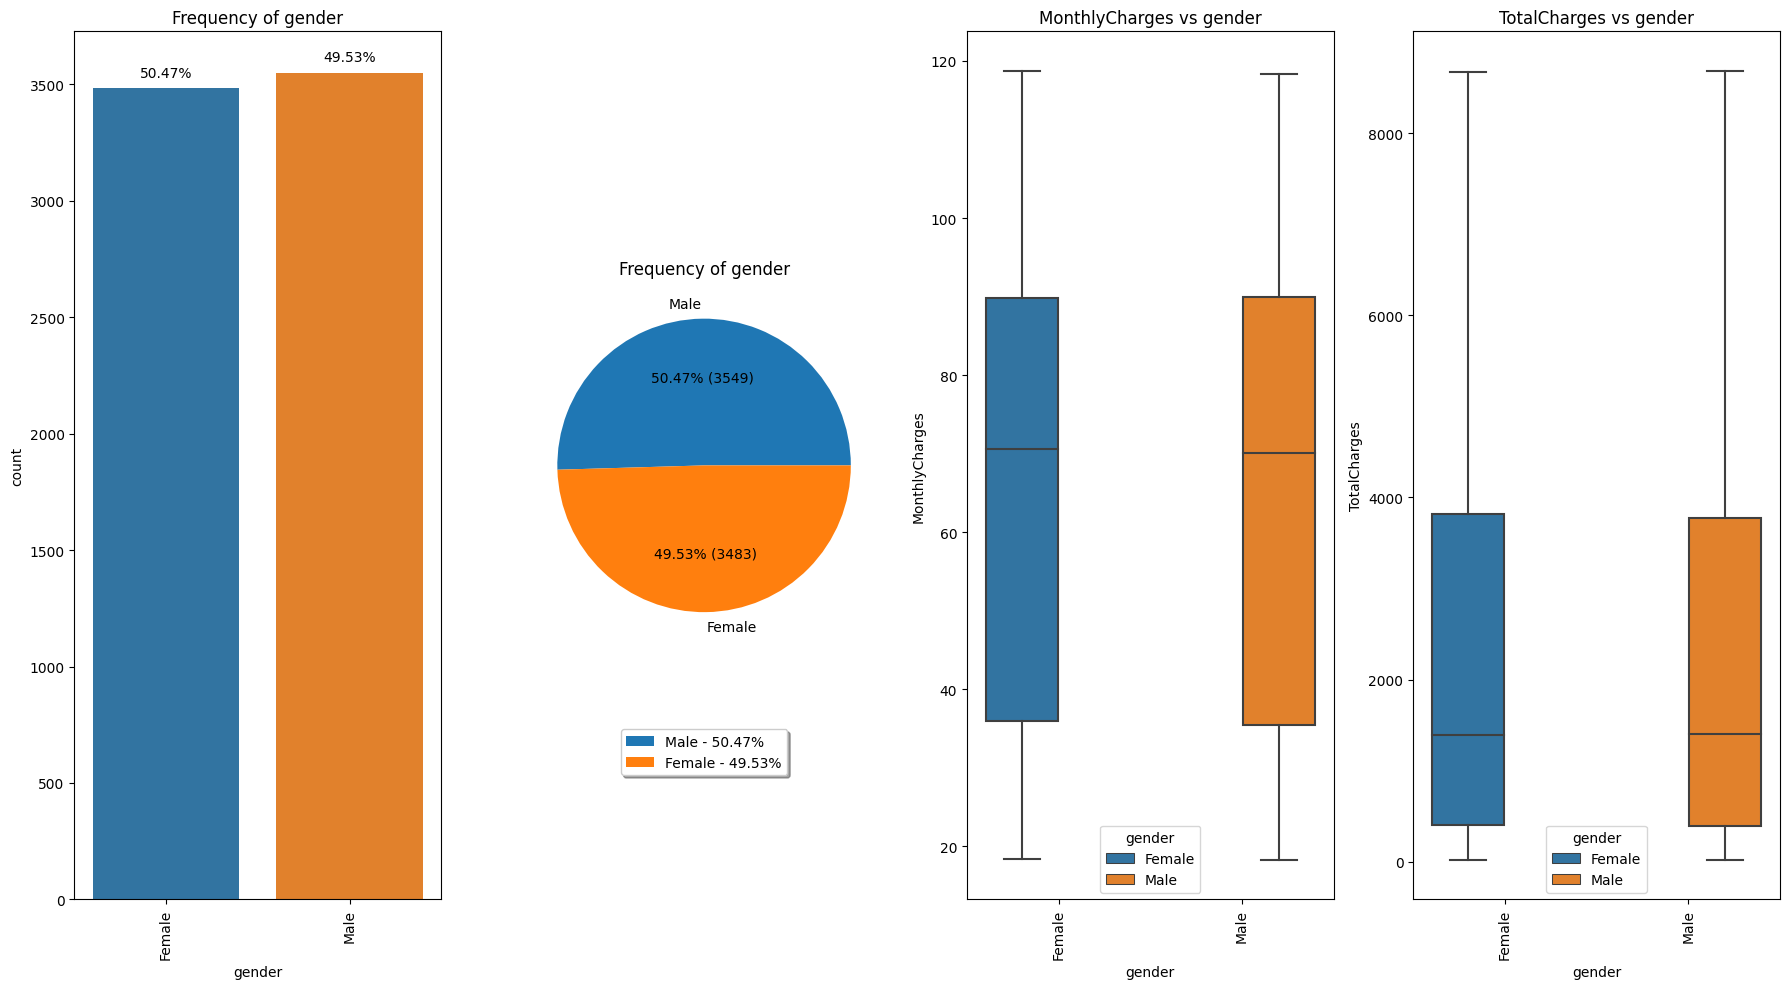

         Partner  Ratio
Partner                
No          3639 51.749
Yes         3393 48.251
######################### *** #########################


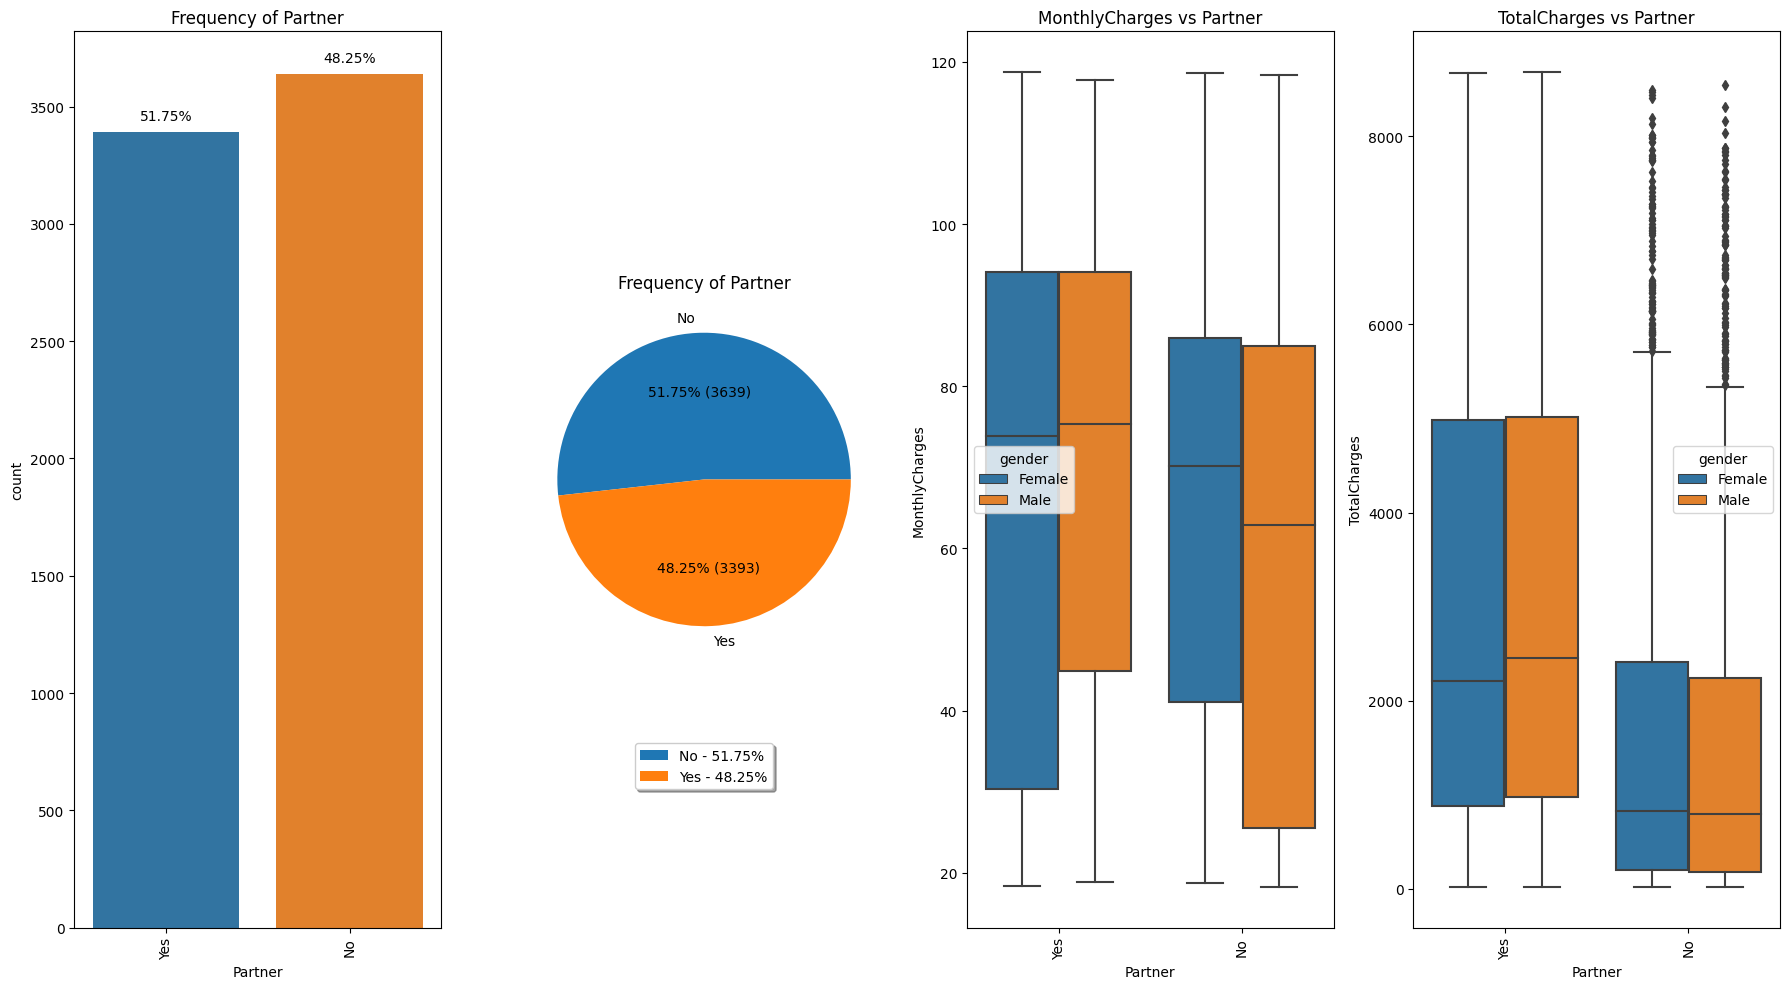

            Dependents  Ratio
Dependents                   
No                4933 70.151
Yes               2099 29.849
######################### *** #########################


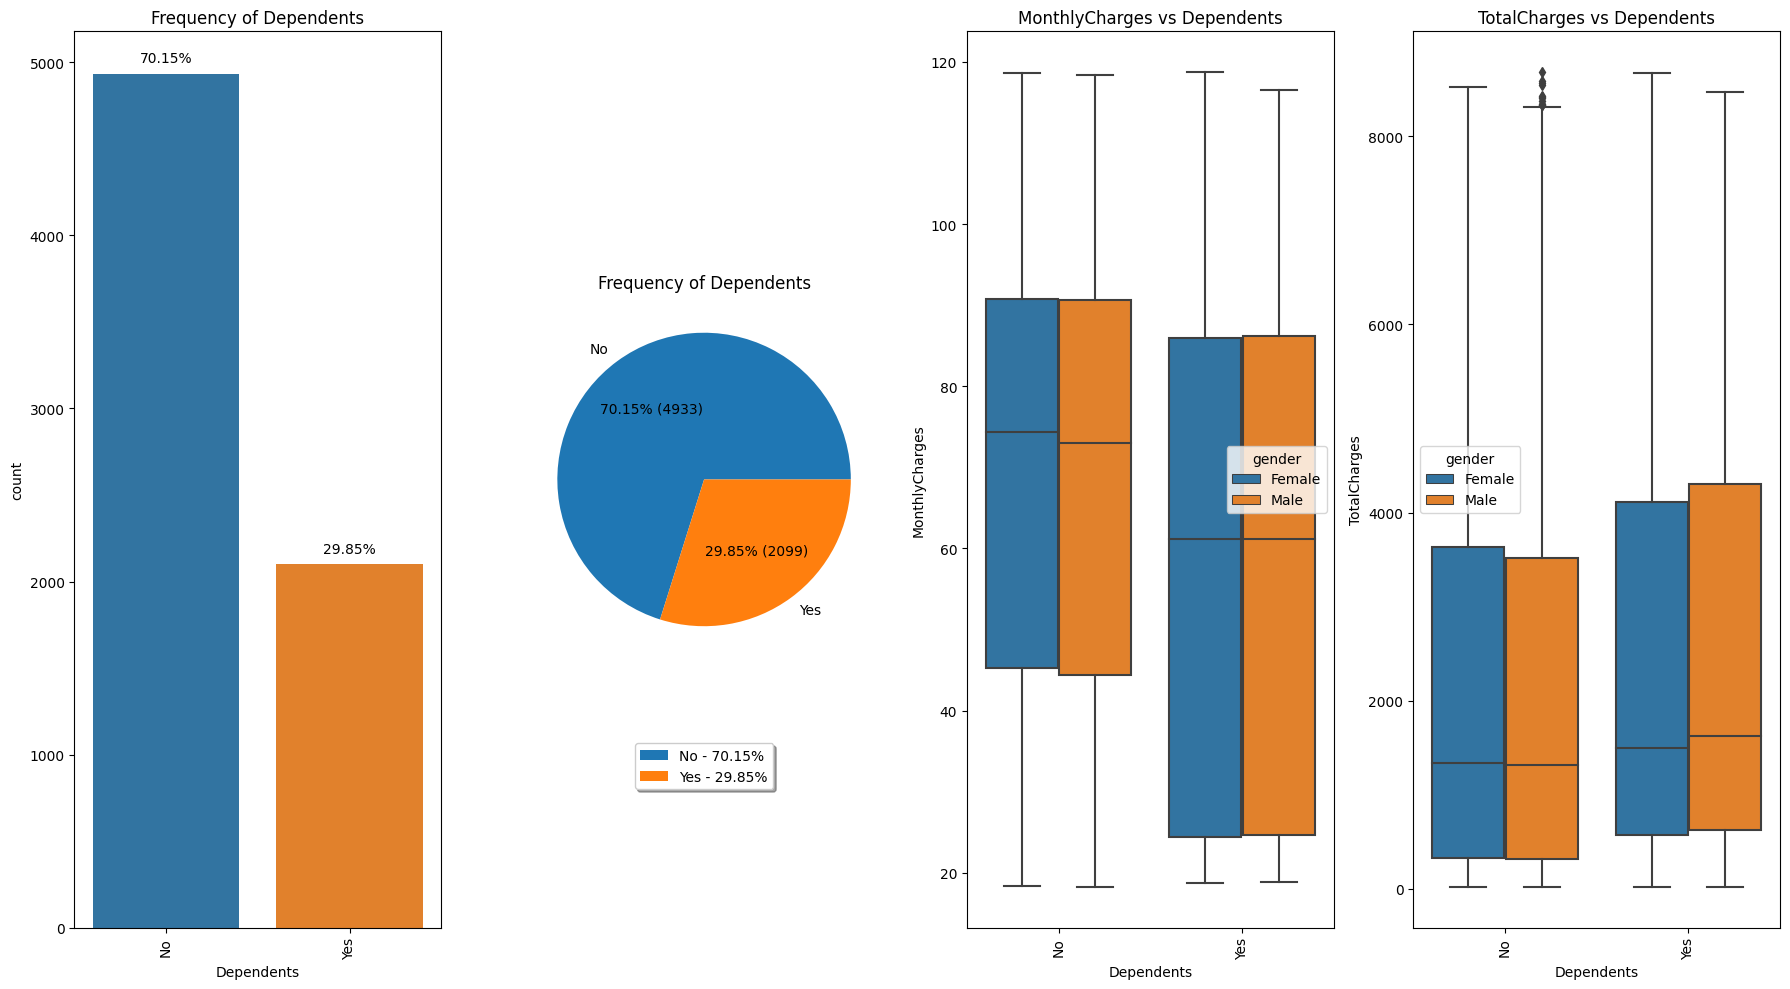

              PhoneService  Ratio
PhoneService                     
Yes                   6352 90.330
No                     680  9.670
######################### *** #########################


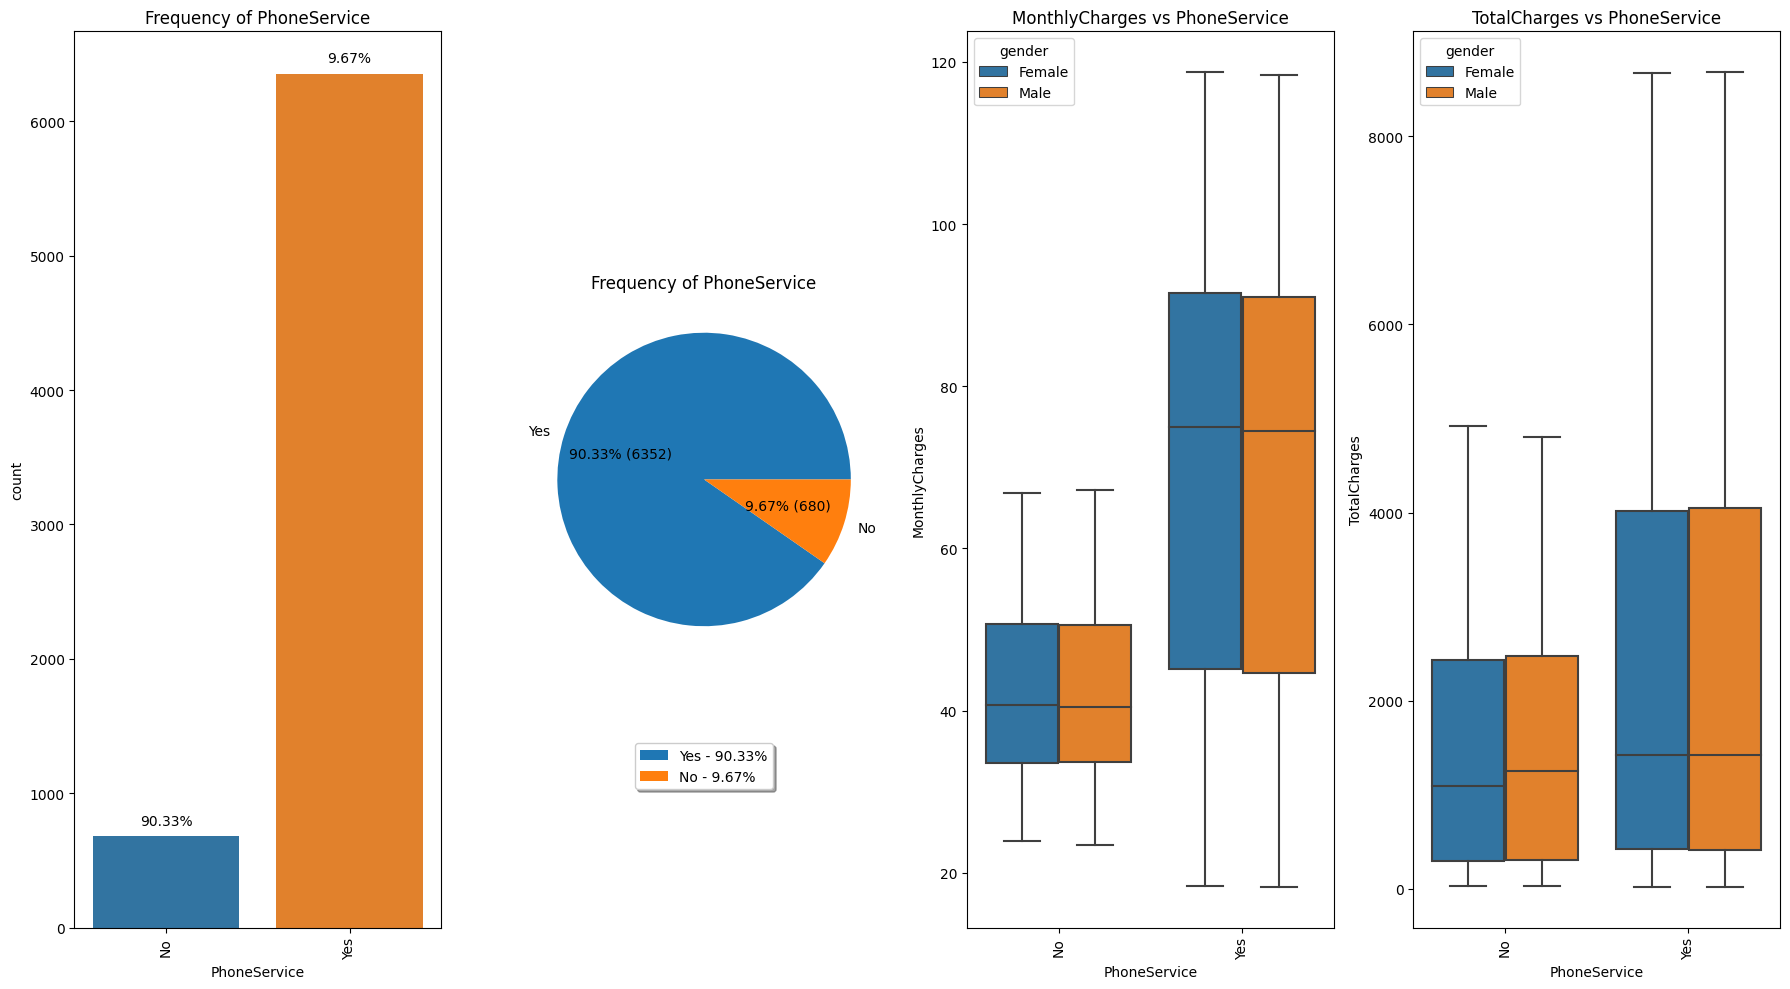

                  MultipleLines  Ratio
MultipleLines                         
No                         3385 48.137
Yes                        2967 42.193
No phone service            680  9.670
######################### *** #########################


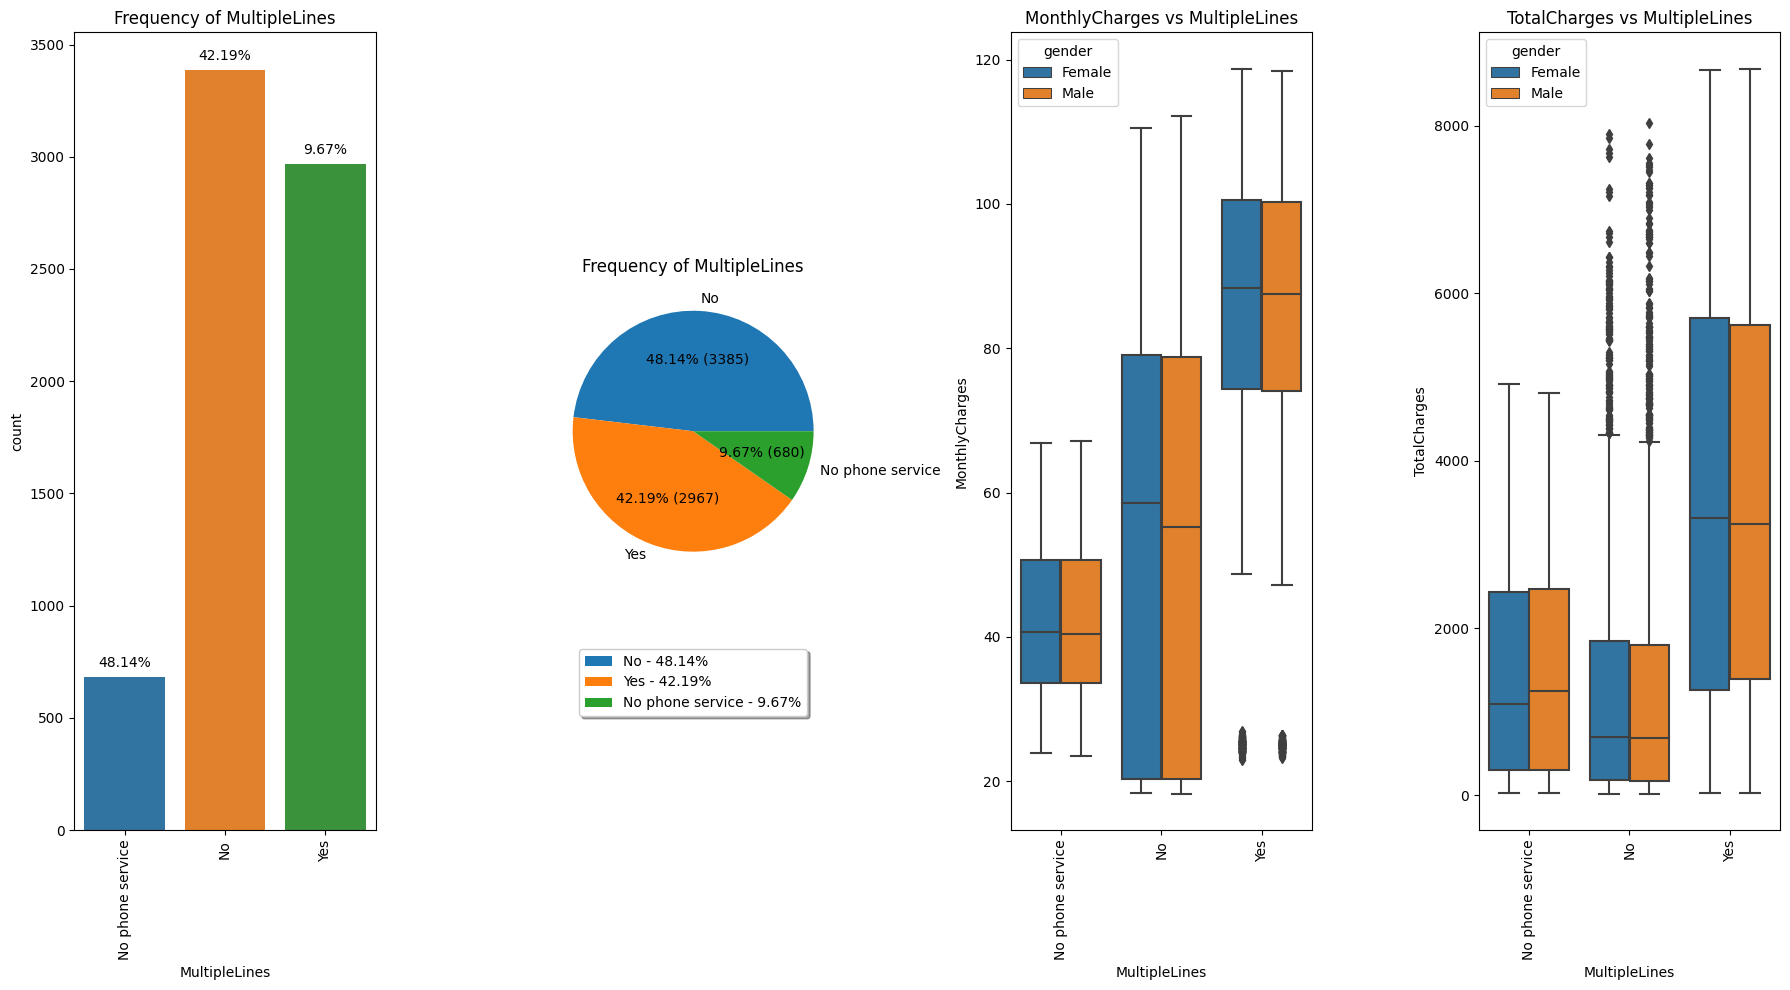

                 InternetService  Ratio
InternetService                        
Fiber optic                 3096 44.027
DSL                         2416 34.357
No                          1520 21.615
######################### *** #########################


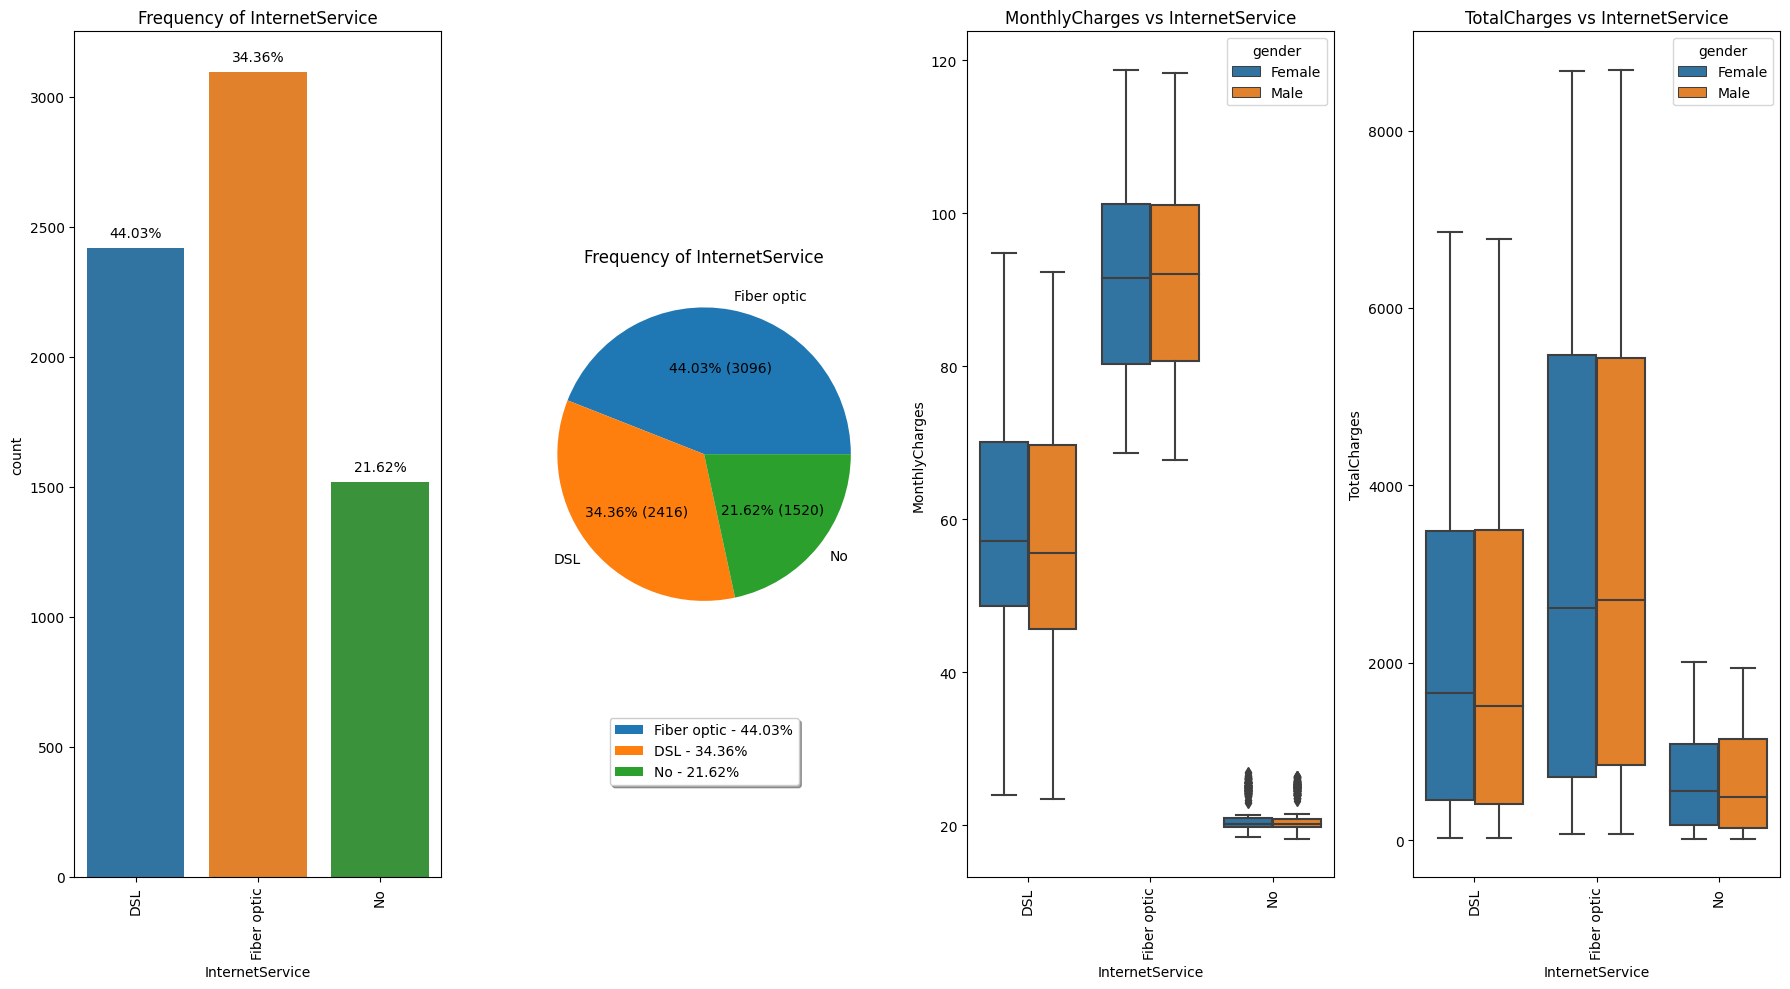

                     OnlineSecurity  Ratio
OnlineSecurity                            
No                             3497 49.730
Yes                            2015 28.655
No internet service            1520 21.615
######################### *** #########################


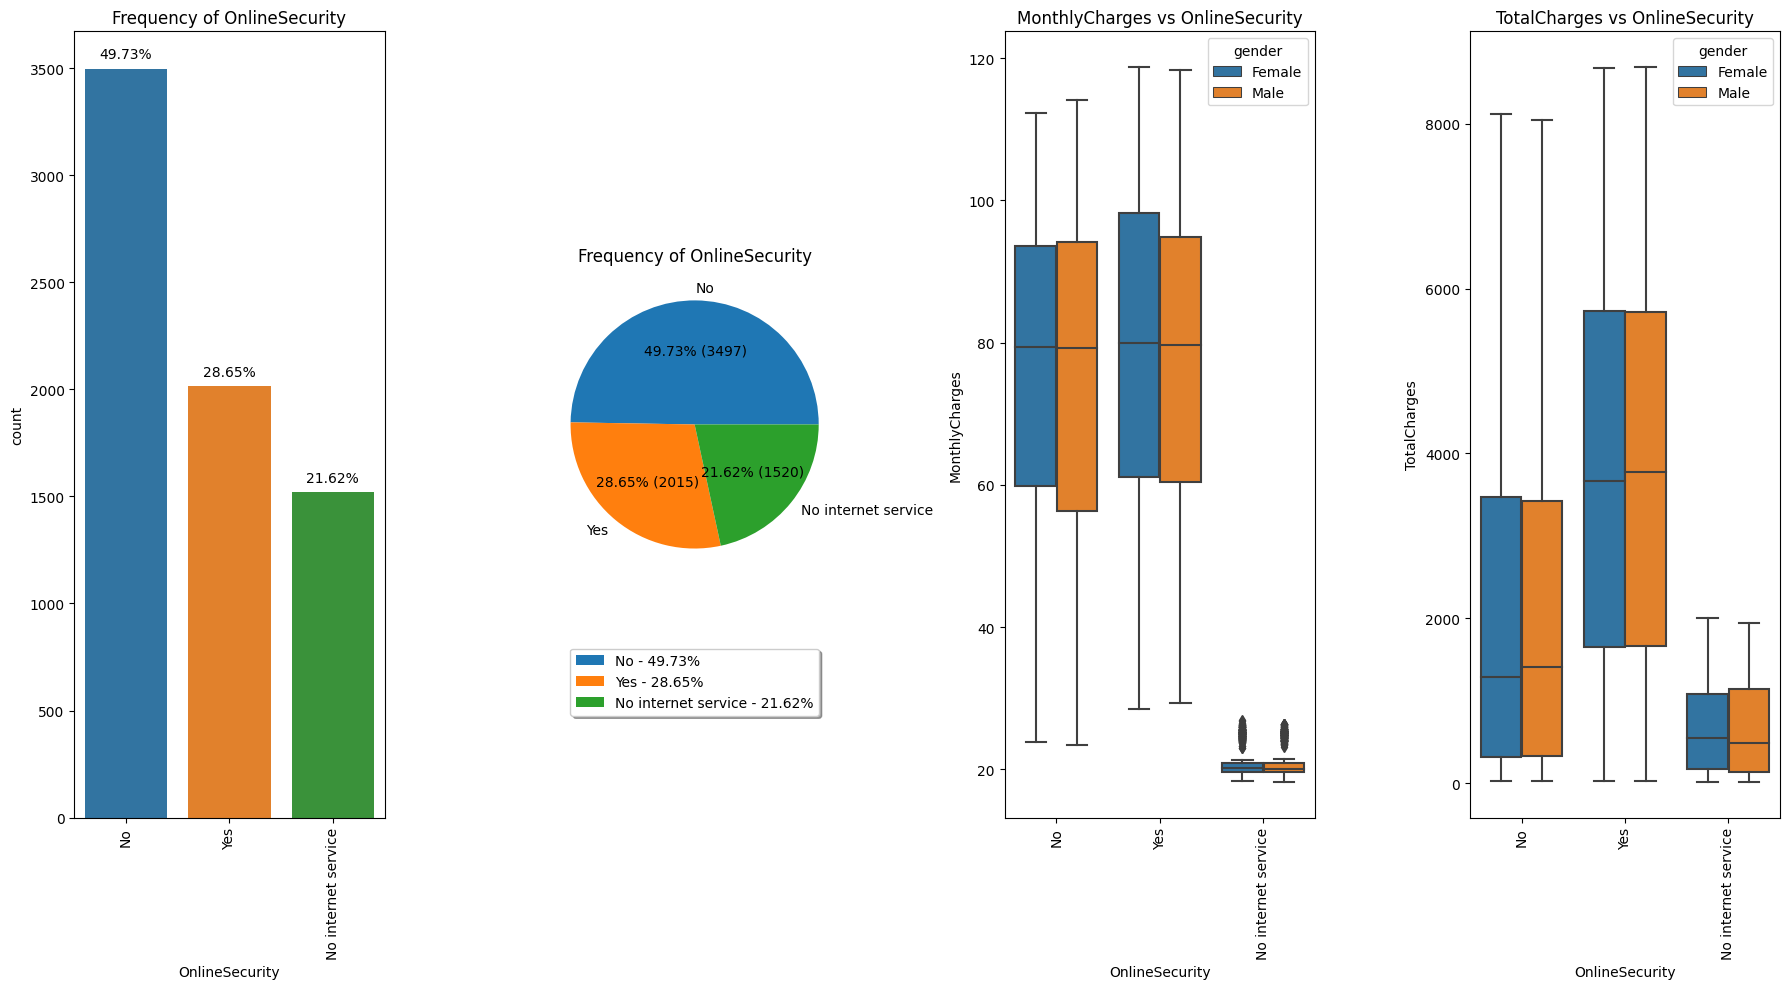

                     OnlineBackup  Ratio
OnlineBackup                            
No                           3087 43.899
Yes                          2425 34.485
No internet service          1520 21.615
######################### *** #########################


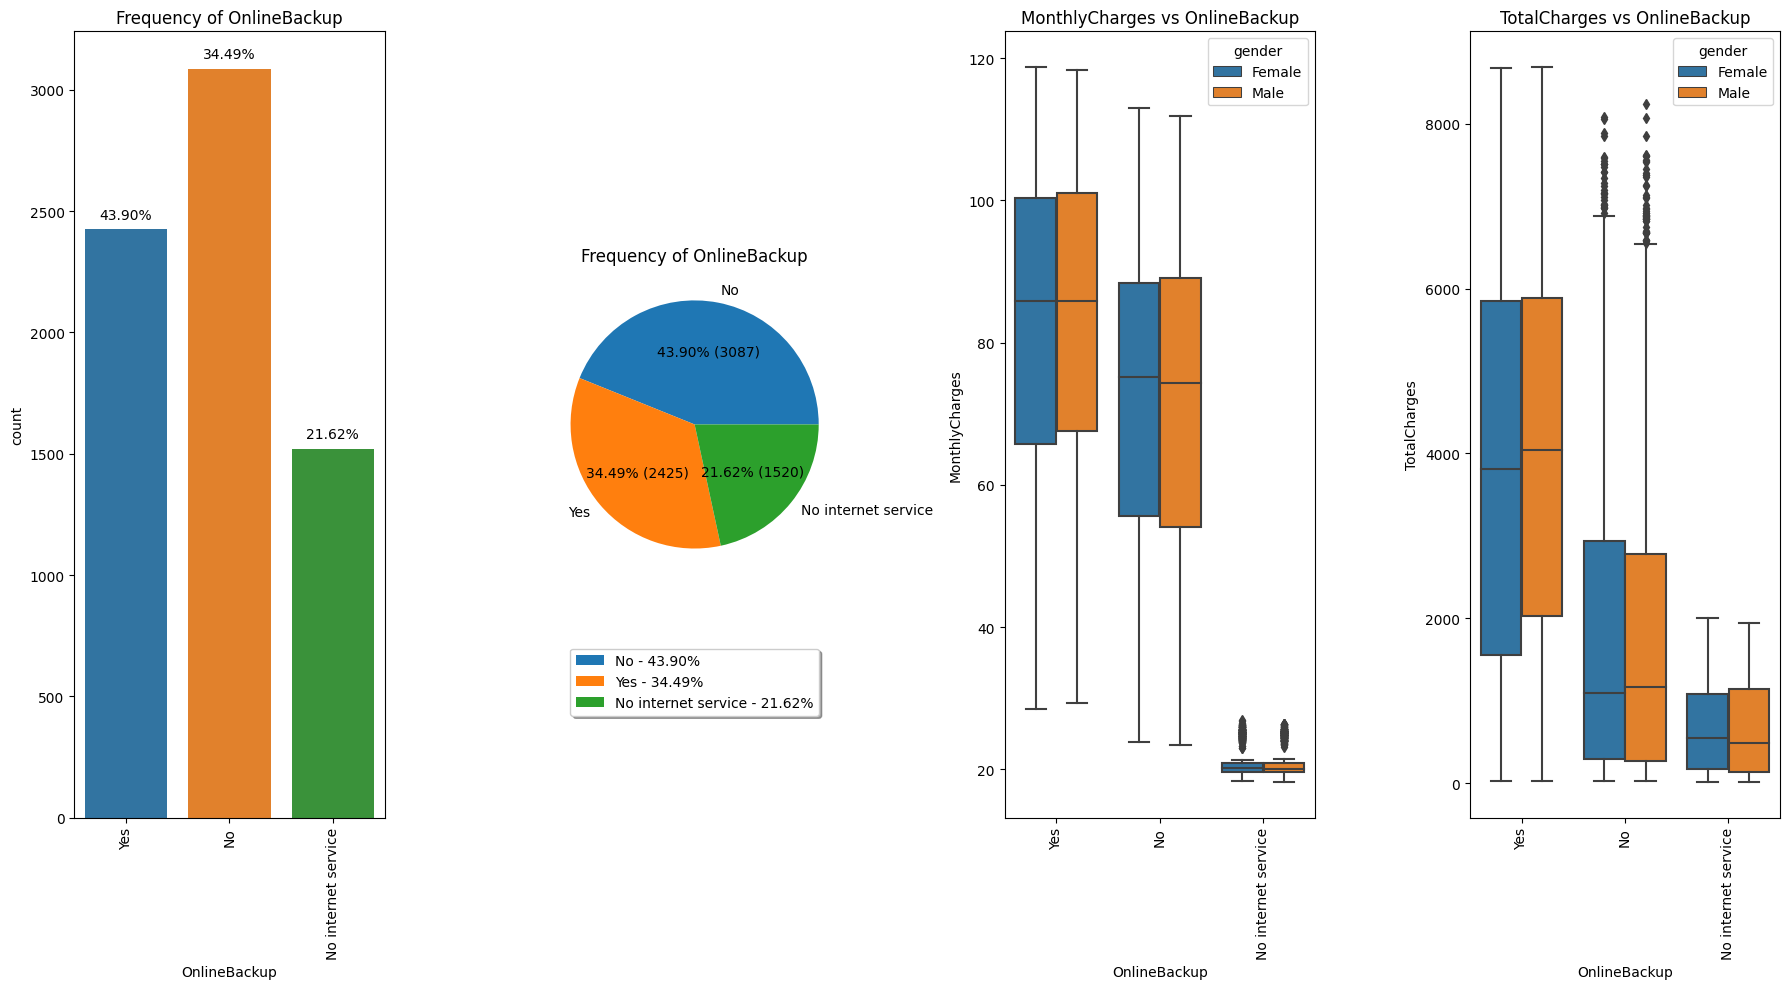

                     DeviceProtection  Ratio
DeviceProtection                            
No                               3094 43.999
Yes                              2418 34.386
No internet service              1520 21.615
######################### *** #########################


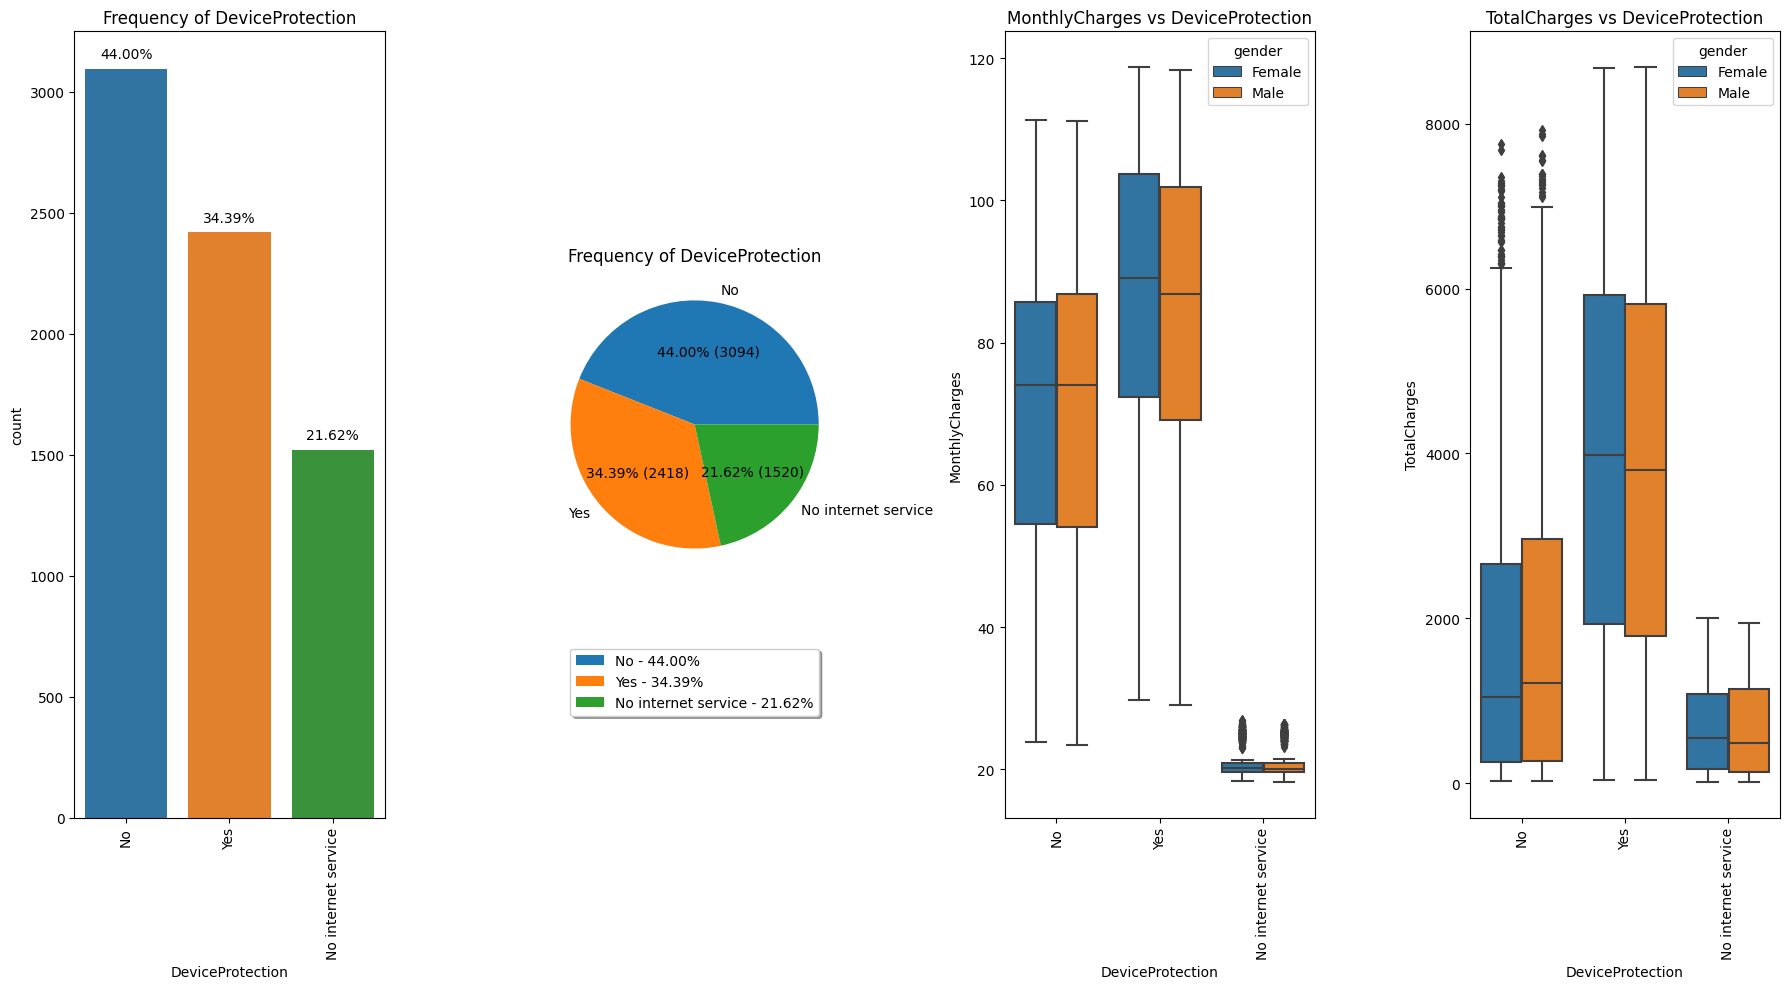

                     TechSupport  Ratio
TechSupport                            
No                          3472 49.374
Yes                         2040 29.010
No internet service         1520 21.615
######################### *** #########################


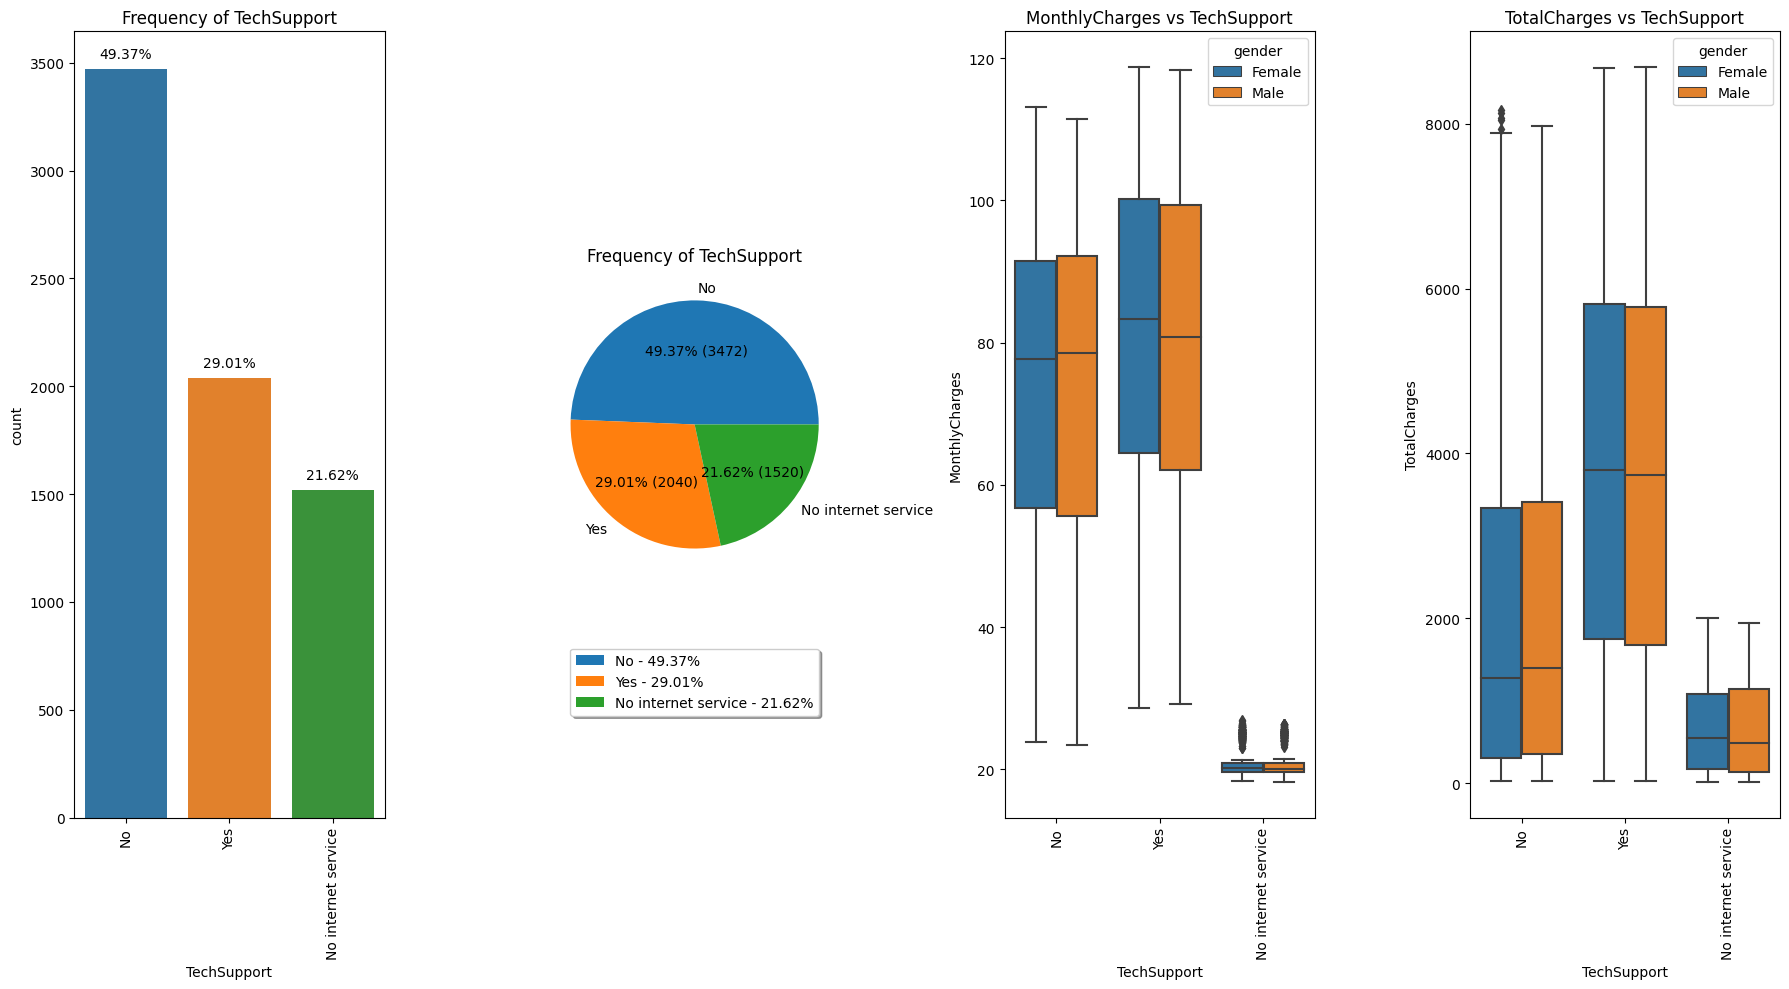

                     StreamingTV  Ratio
StreamingTV                            
No                          2809 39.946
Yes                         2703 38.439
No internet service         1520 21.615
######################### *** #########################


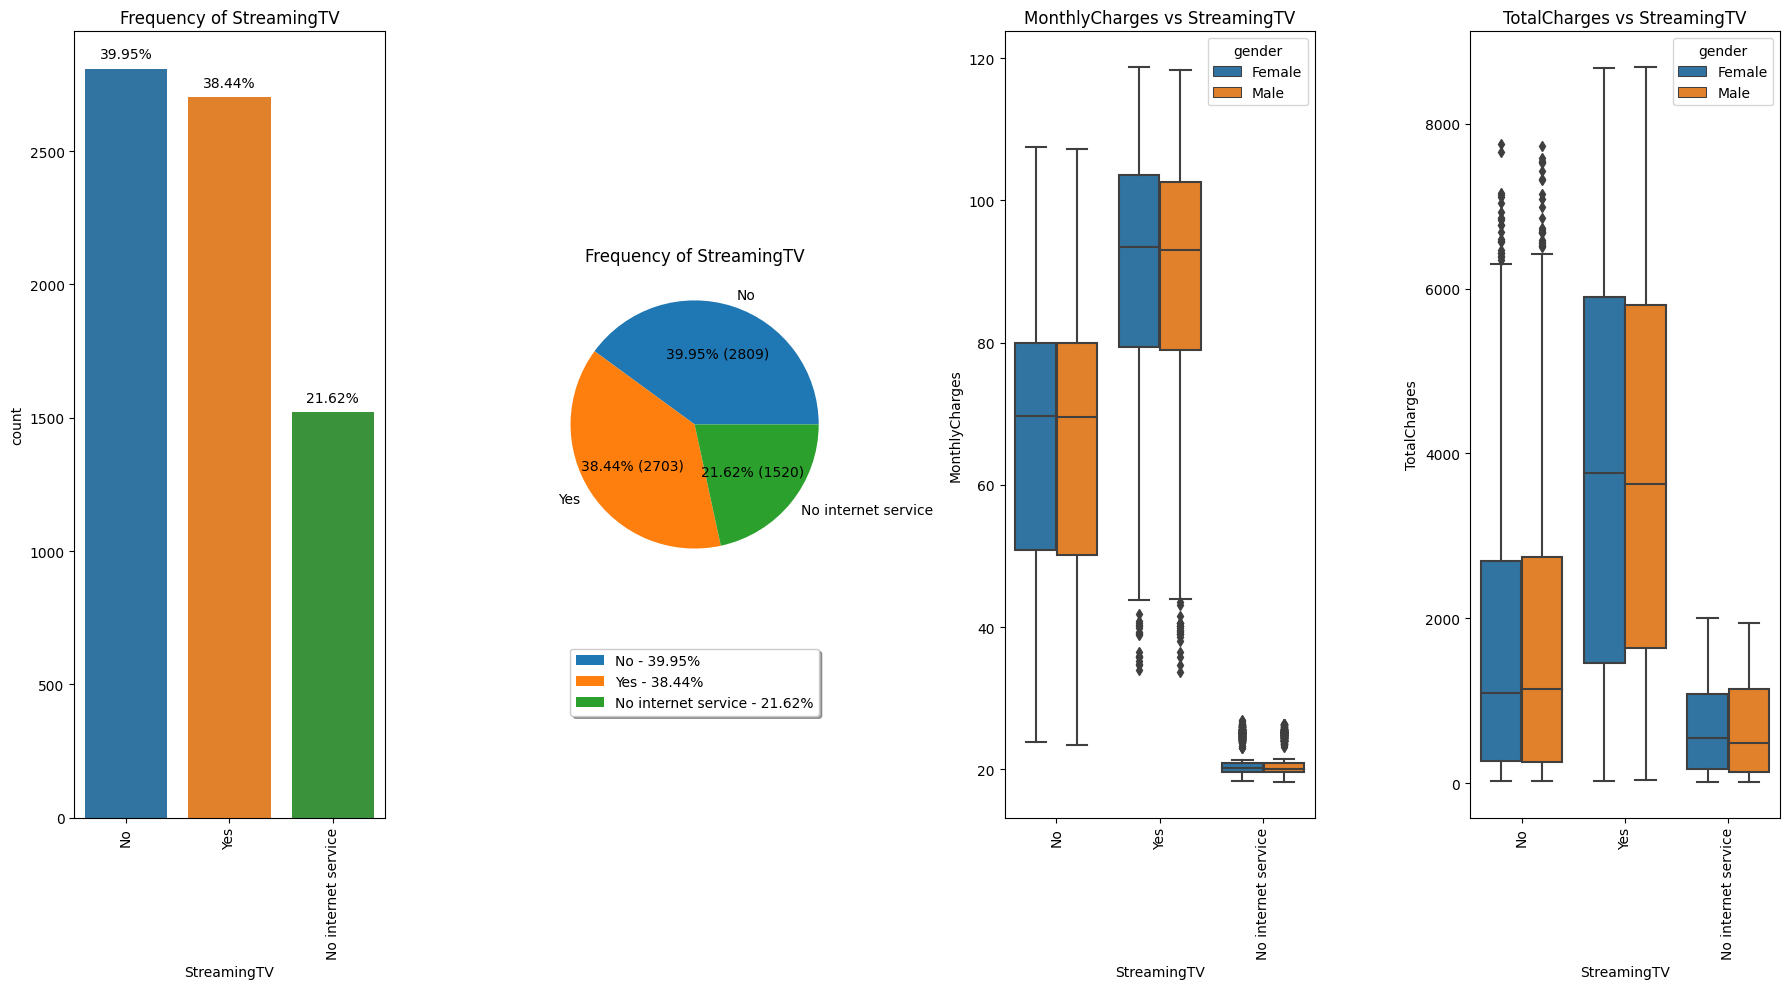

                     StreamingMovies  Ratio
StreamingMovies                            
No                              2781 39.548
Yes                             2731 38.837
No internet service             1520 21.615
######################### *** #########################


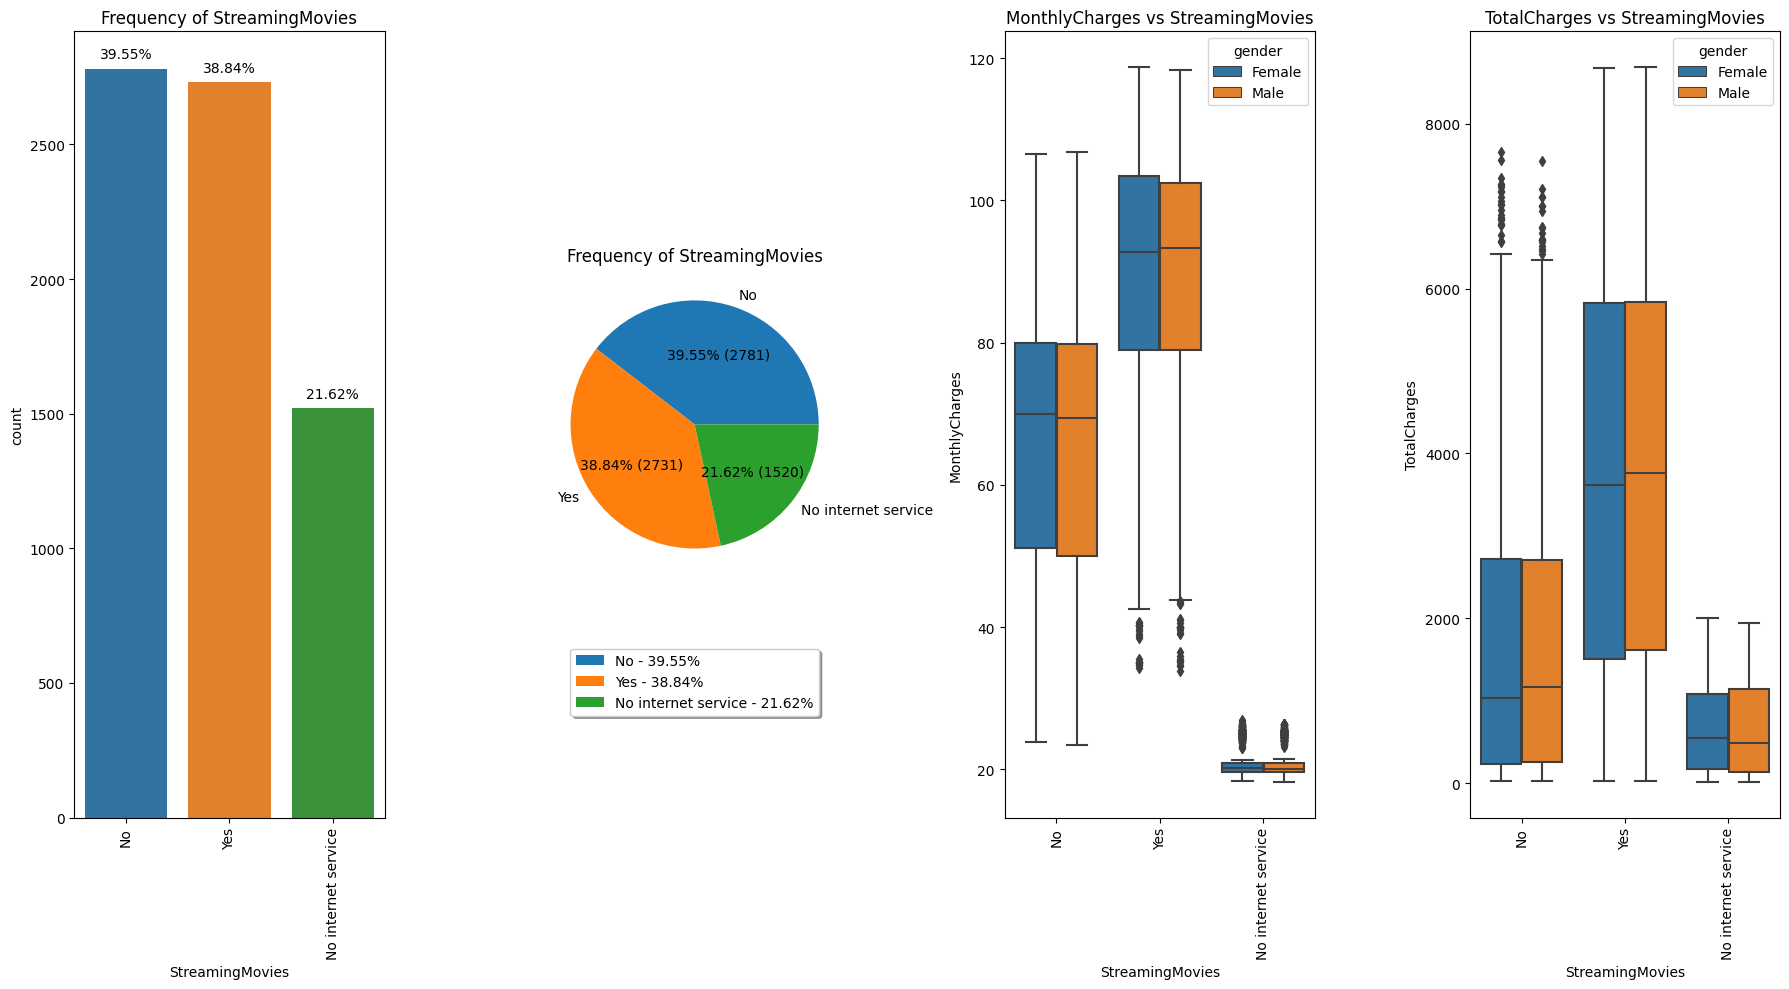

                Contract  Ratio
Contract                       
Month-to-month      3875 55.105
Two year            1685 23.962
One year            1472 20.933
######################### *** #########################


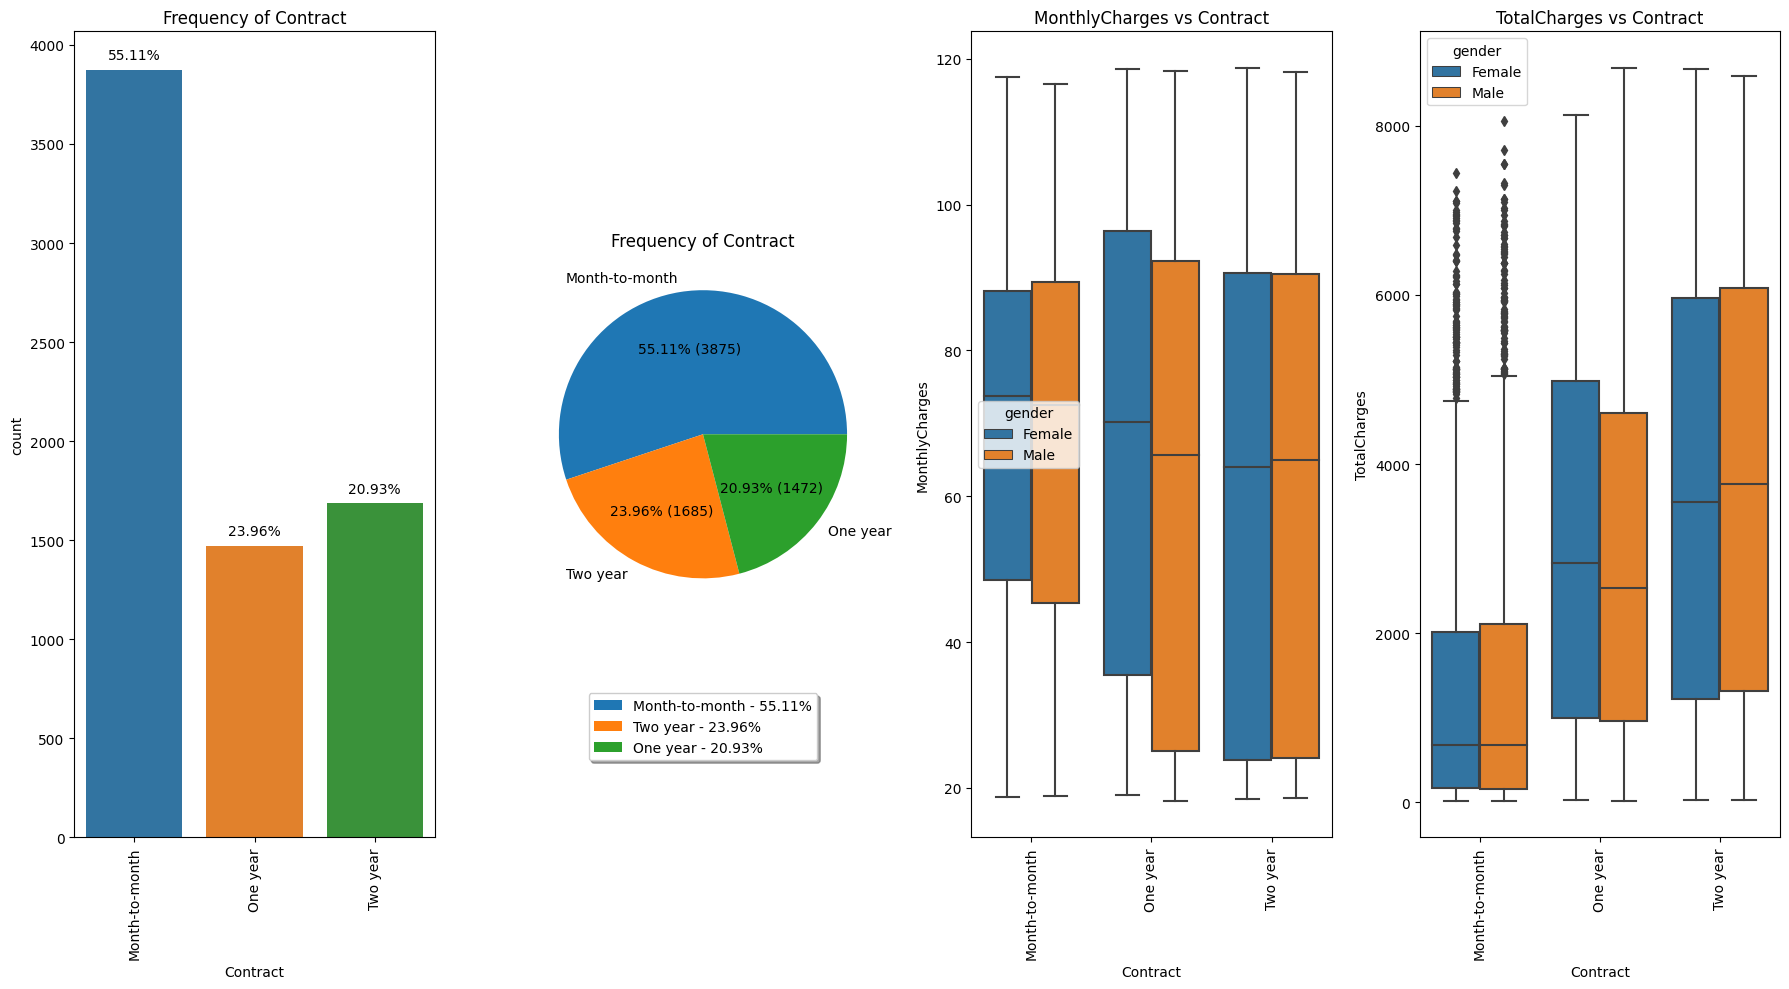

                  PaperlessBilling  Ratio
PaperlessBilling                         
Yes                           4168 59.272
No                            2864 40.728
######################### *** #########################


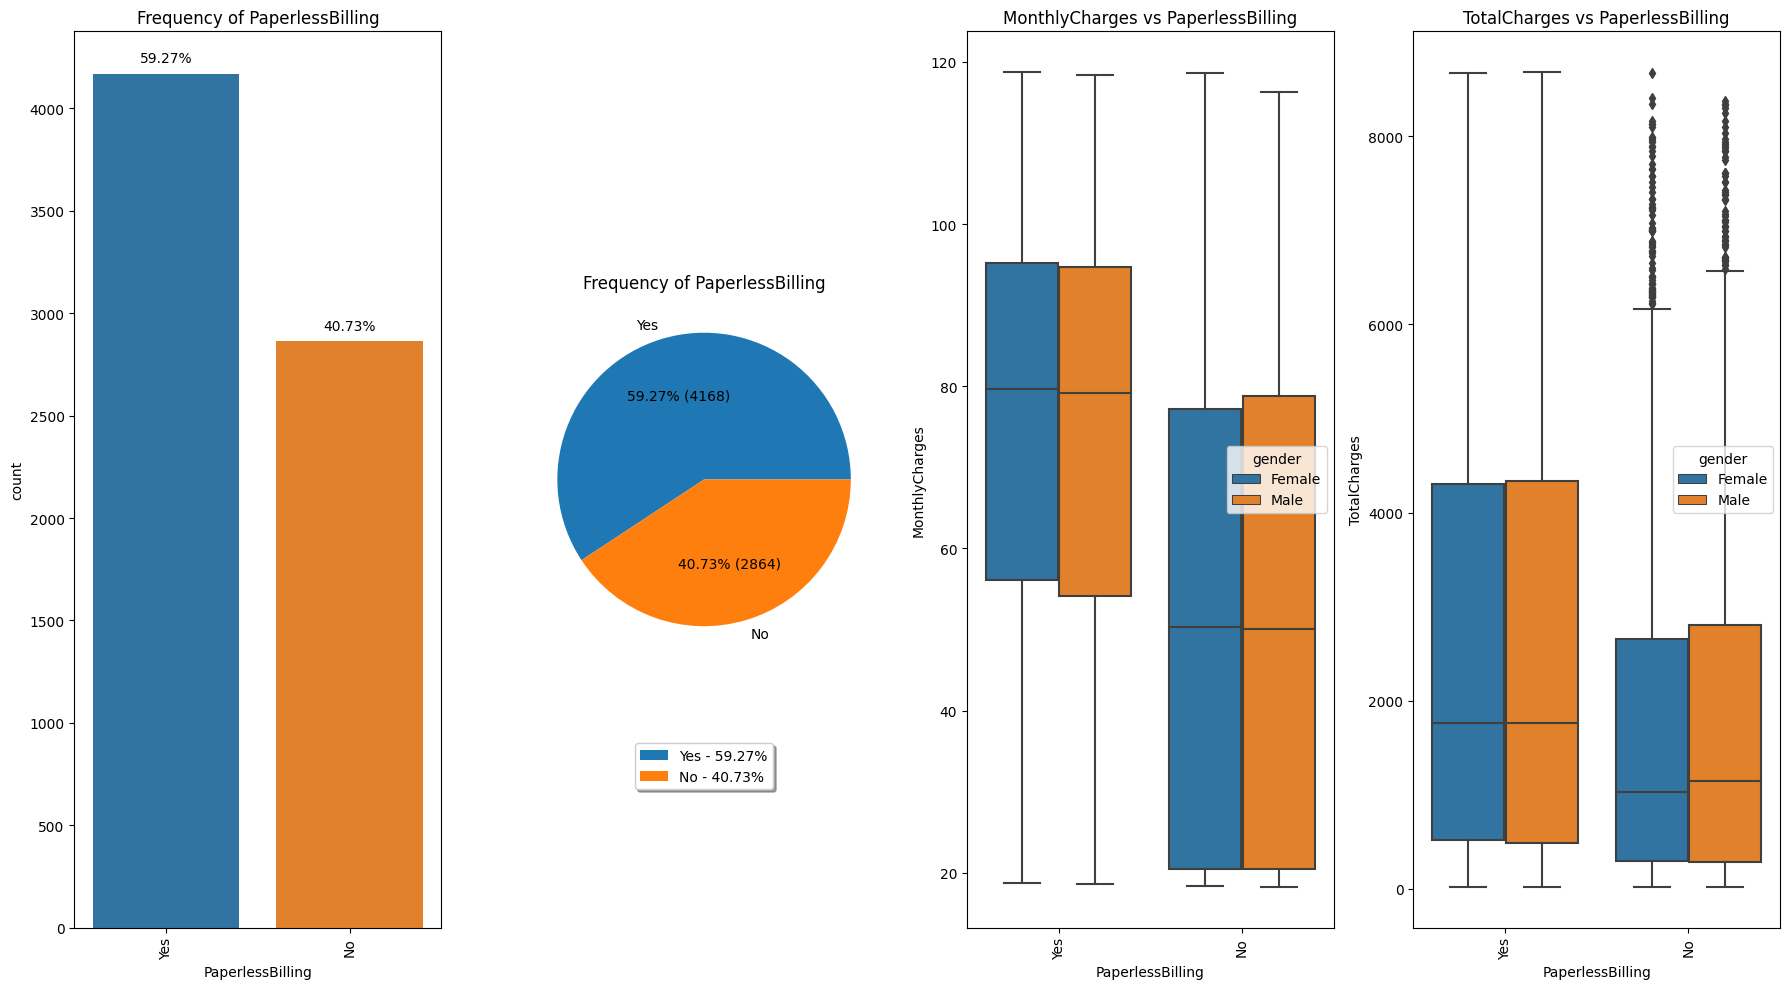

                           PaymentMethod  Ratio
PaymentMethod                                  
Electronic check                    2365 33.632
Mailed check                        1604 22.810
Bank transfer (automatic)           1542 21.928
Credit card (automatic)             1521 21.630
######################### *** #########################


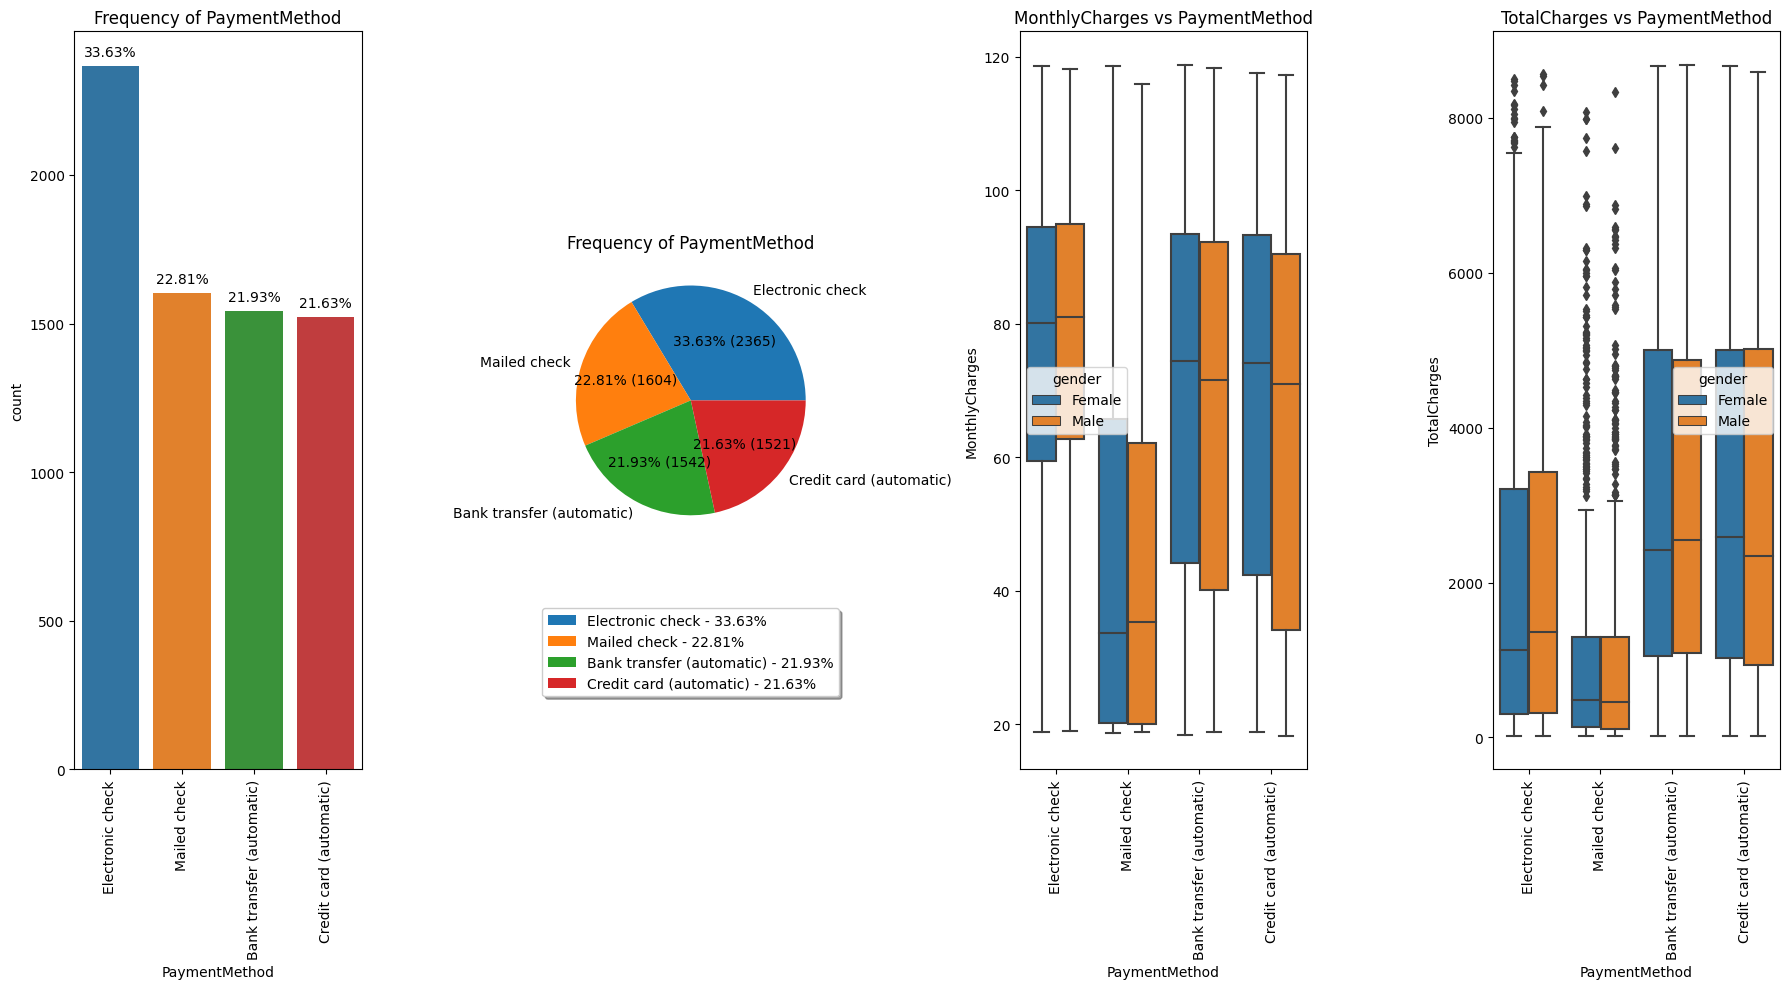

       Churn  Ratio
Churn              
No      5163 73.422
Yes     1869 26.578
######################### *** #########################


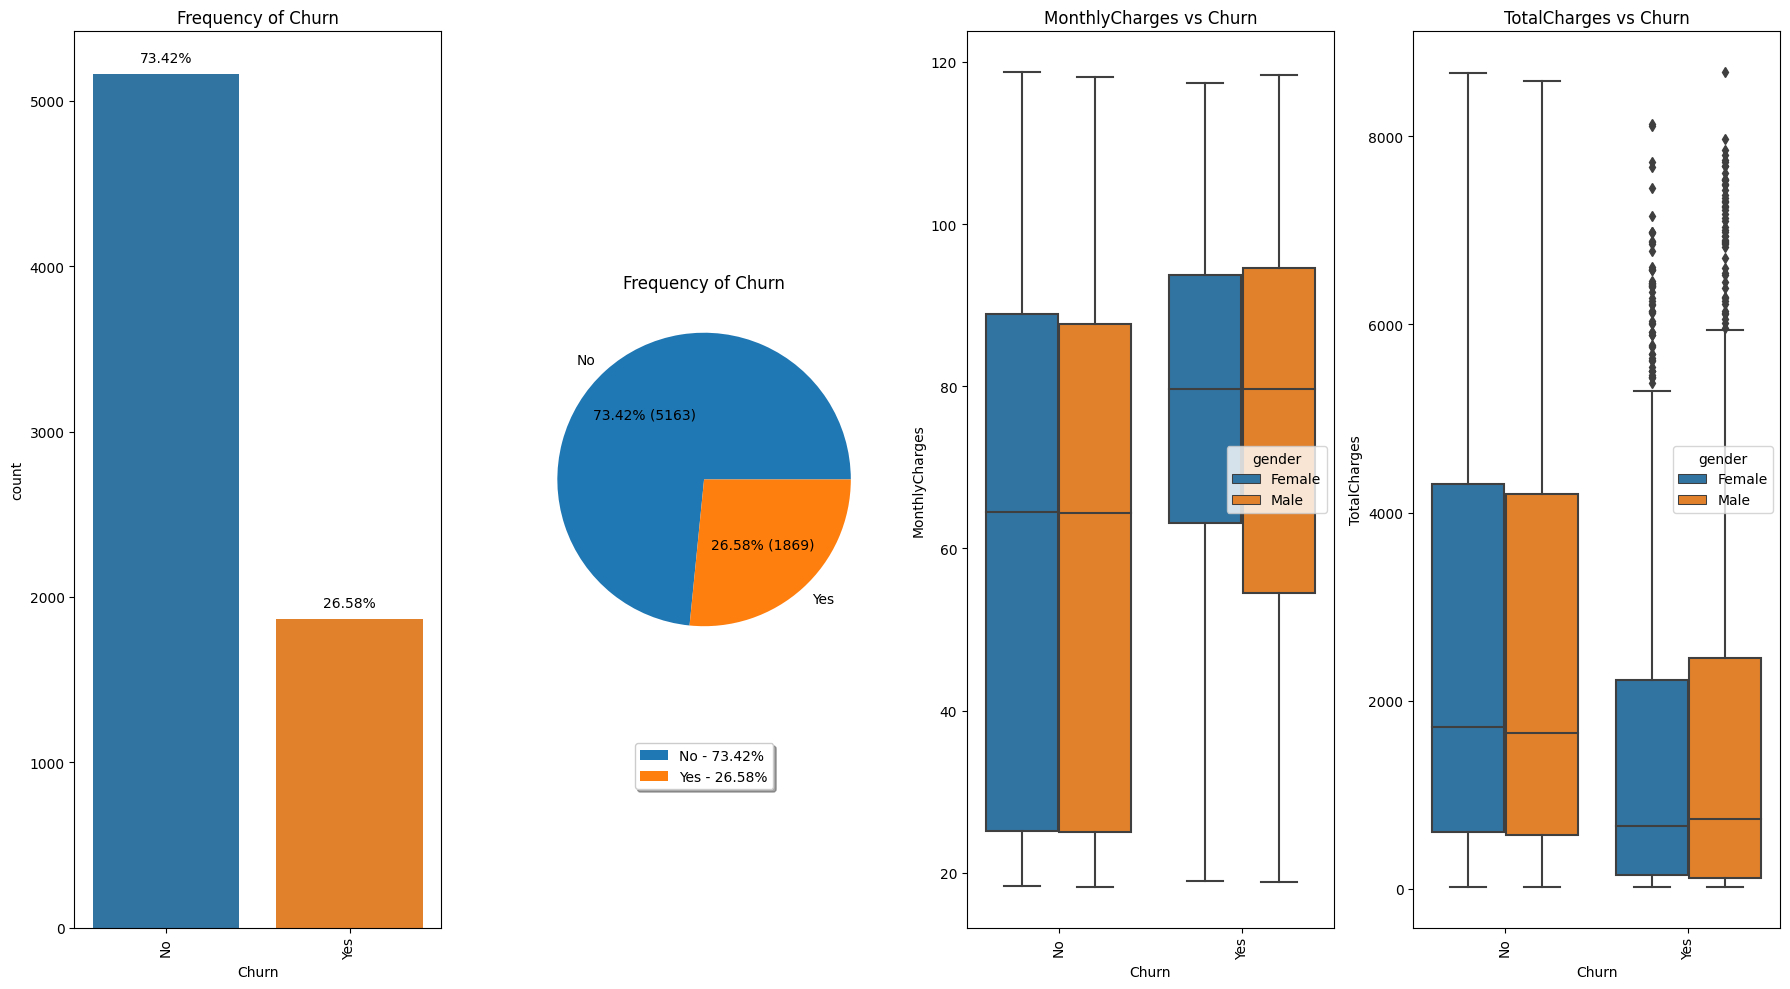

               SeniorCitizen  Ratio
SeniorCitizen                      
0                       5890 83.760
1                       1142 16.240
######################### *** #########################


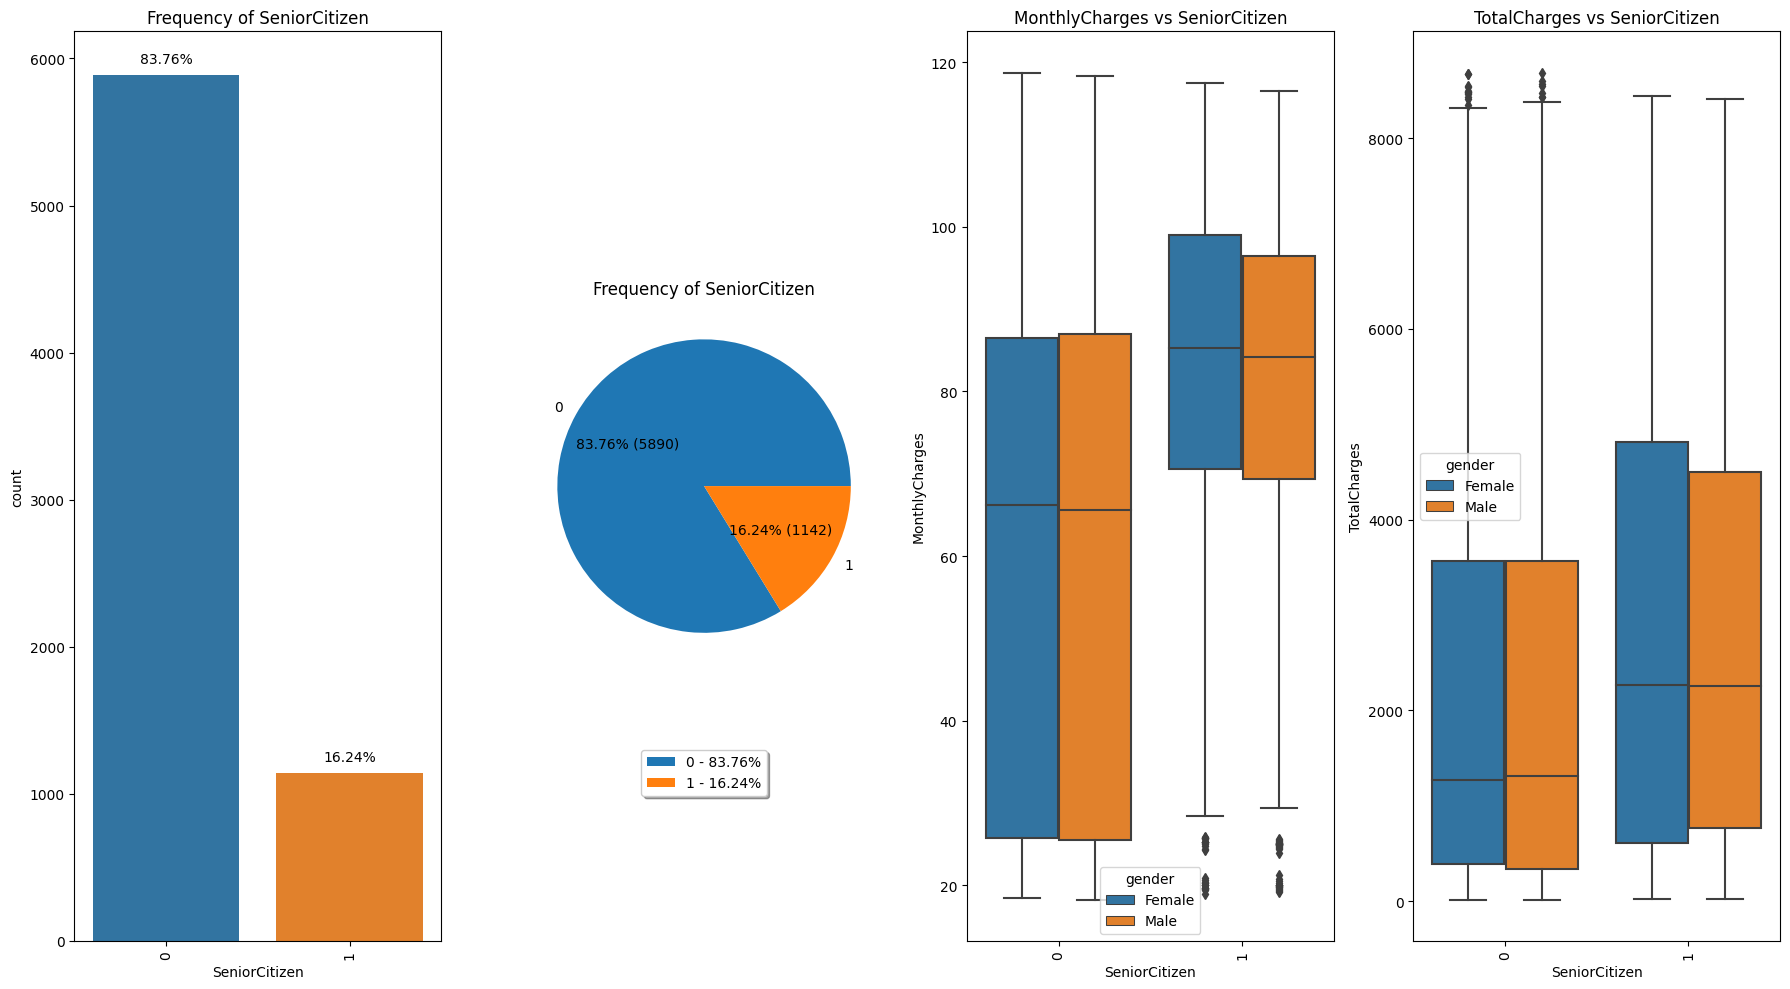

In [12]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

count   7032.000
mean      32.422
std       24.545
min        1.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.800
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64


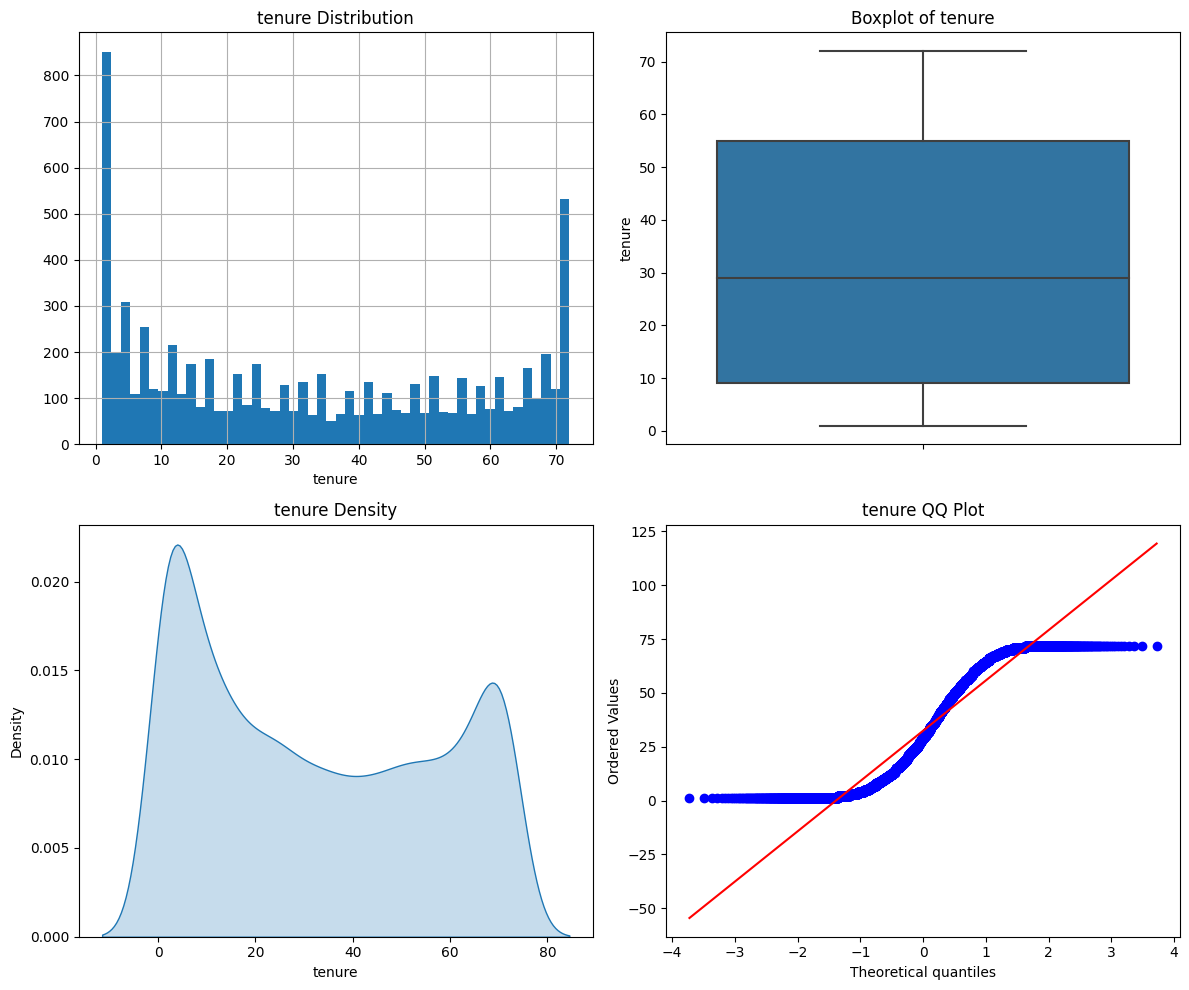

#####################################
count   7032.000
mean      64.798
std       30.086
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.900
40%       58.920
50%       70.350
60%       79.150
70%       85.535
80%       94.300
90%      102.645
95%      107.422
99%      114.734
max      118.750
Name: MonthlyCharges, dtype: float64


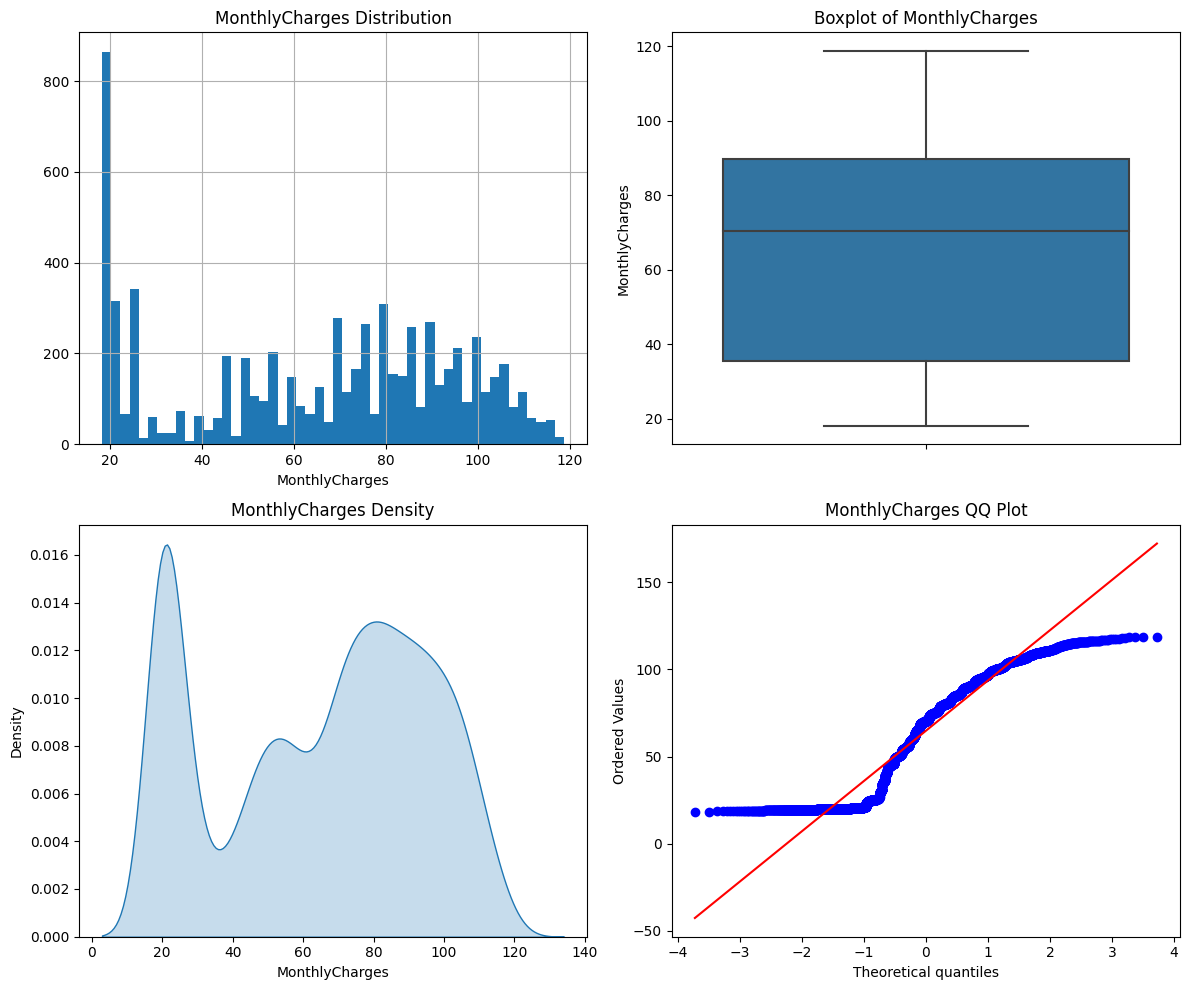

#####################################
count   7032.000
mean    2283.300
std     2266.771
min       18.800
5%        49.605
10%       84.600
20%      267.070
30%      551.995
40%      944.170
50%     1397.475
60%     2048.950
70%     3141.130
80%     4475.410
90%     5976.640
95%     6923.590
99%     8039.883
max     8684.800
Name: TotalCharges, dtype: float64


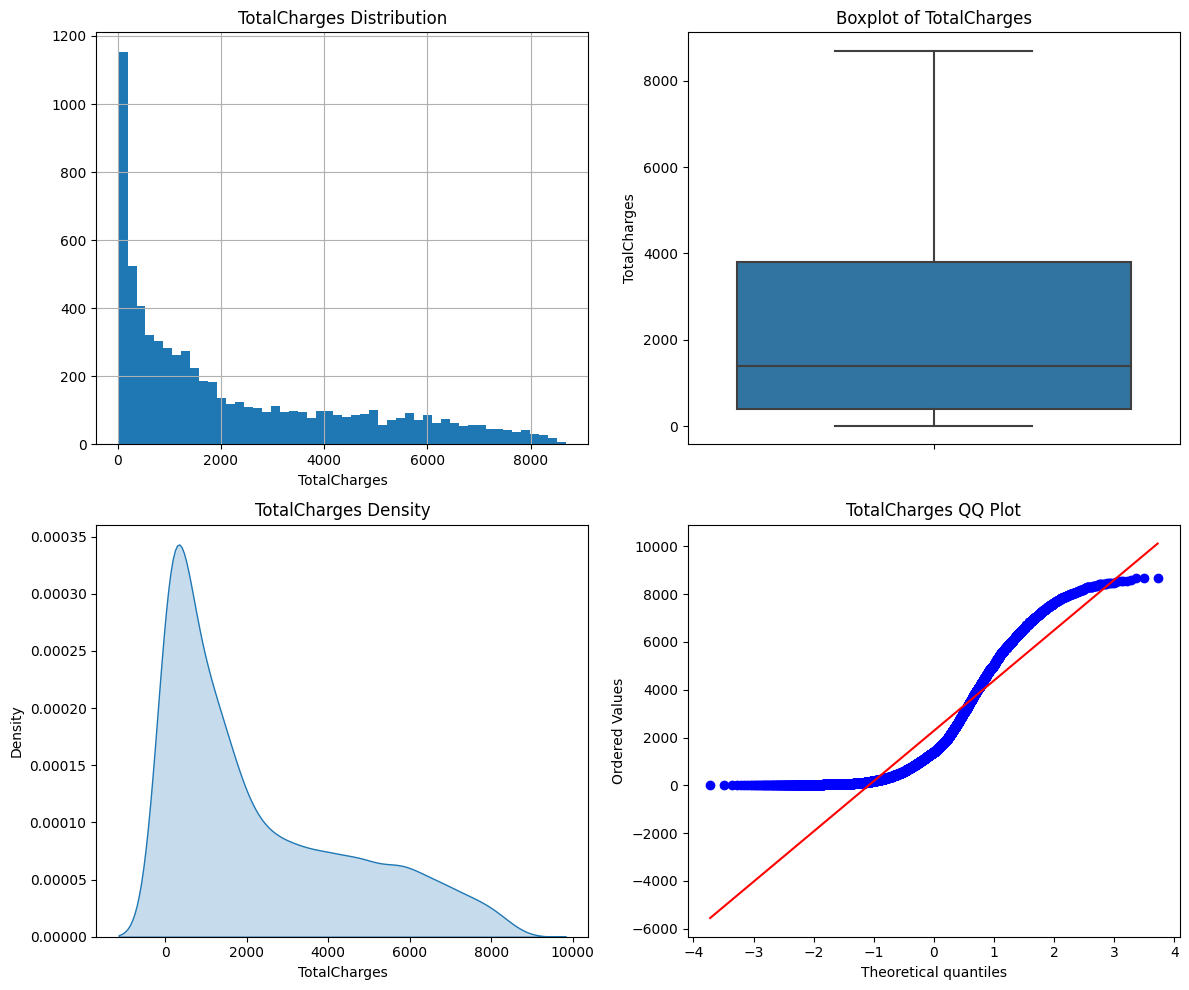

#####################################


In [13]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    
    if plot:
        fig, axs = plt.subplots(2, 2, figsize=(12, 10))
        
        # Histogram
        plt.subplot(2, 2, 1)
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col + ' Distribution')
        
        # Boxplot
        plt.subplot(2, 2, 2)
        sns.boxplot(y=numerical_col, data=dataframe)
        plt.title("Boxplot of " + numerical_col)
        plt.xticks(rotation=90)
        
        # Density Plot
        plt.subplot(2, 2, 3)
        sns.kdeplot(dataframe[numerical_col], shade=True)
        plt.xlabel(numerical_col)
        plt.title(numerical_col + ' Density')
        
        # QQ Plot
        plt.subplot(2, 2, 4)
        stats.probplot(dataframe[numerical_col], dist="norm", plot=plt)
        plt.title(numerical_col + ' QQ Plot')
        
        plt.tight_layout()
        plt.show(block=True)
        
    print("#####################################")

for col in num_cols:
    num_summary(df, col, plot=True)

In [14]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df, "Churn", col)

       tenure
Churn        
No     37.650
Yes    17.979


       MonthlyCharges
Churn                
No             61.307
Yes            74.441


       TotalCharges
Churn              
No         2555.344
Yes        1531.796




# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #3383; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> FIRST ML </div>

In [15]:
dfd = df.copy()
cat_cols = [col for col in cat_cols if col not in ["Churn"]]
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'SeniorCitizen']

In [16]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first, dtype = int)
    return dataframe
dfd = one_hot_encoder(dfd, cat_cols, drop_first=True)

In [17]:
dfd["Churn"] = dfd["Churn"].map({"No": 0, "Yes":1})

In [18]:
dfd.head()

tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  Partner_Yes  \
0       1          29.850        29.850      0            0            1   
1      34          56.950      1889.500      0            1            0   
2       2          53.850       108.150      1            1            0   
3      45          42.300      1840.750      0            1            0   
4       2          70.700       151.650      1            0            0   

   Dependents_Yes  PhoneService_Yes  MultipleLines_No phone service  \
0               0                 0                               1   
1               0                 1                               0   
2               0                 1                               0   
3               0                 0                               1   
4               0                 1                               0   

   MultipleLines_Yes  InternetService_Fiber optic  InternetService_No  \
0                  0                            0                   0   
1                  0                            0                   0   
2                  0                            0                   0   
3                  0                            0                   0   
4                  0                            1                   0   

   OnlineSecurity_No internet service  OnlineSecurity_Yes  \
0                                   0                   0   
1                                   0                   1   
2                                   0                   1   
3                                   0                   1   
4                                   0                   0   

   OnlineBackup_No internet service  OnlineBackup_Yes  \
0                                 0                 1   
1                                 0                 0   
2                                 0                 1   
3                                 0                 0   
4                                 0                 0   

   DeviceProtection_No internet service  DeviceProtection_Yes  \
0                                     0                     0   
1                                     0                     1   
2                                     0                     0   
3                                     0                     1   
4                                     0                     0   

   TechSupport_No internet service  TechSupport_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                1   
4                                0                0   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                0   
4                                0                0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0                  0                  0                     1   
1                  1                  0                     0   
2                  0                  0                     1   
3                  1                  0                     0   
4                  0                  0                     1   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               

In [19]:
y = dfd["Churn"]
X = dfd.drop(["Churn"], axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y, test_size=0.30, random_state=17)

In [21]:
catboost_model = CatBoostClassifier(verbose=False, random_state=42).fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)

print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(y_pred,y_test),4)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 4)}")
print(f"F1: {round(f1_score(y_pred,y_test), 4)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 4)}")

Accuracy: 0.8
Recall: 0.6469
Precision: 0.5455
F1: 0.5919
Auc: 0.7456


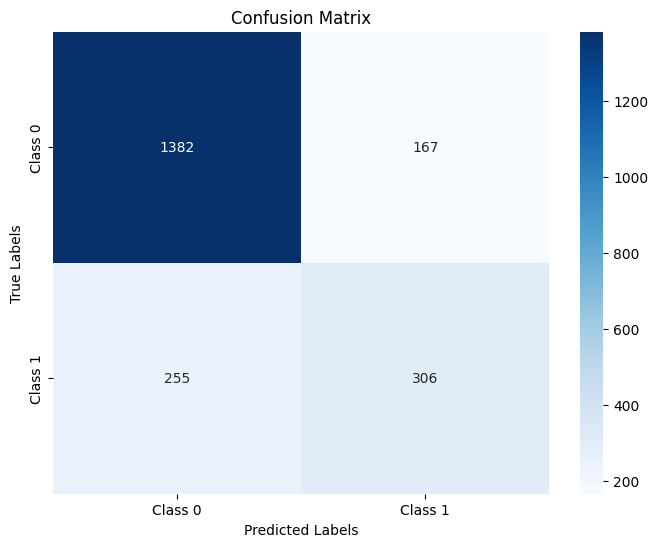

In [22]:
cm = confusion_matrix(y_test, y_pred)

class_labels = ['Class 0', 'Class 1']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #3383; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> FEATURE ENGINEERING </div>

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [24]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check          29.850        29.850   
1               No               Mailed check          56.950      1889.500   
2              Yes               Mailed check          53.850       108.150   
3               No  Bank transfer (automatic)          42.300      1840.750   
4              Yes           Electronic check          70.700       151.650   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [25]:
df["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [26]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [27]:
df["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [28]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [29]:
"""onehot = ["gender", "MultipleLines","Contract", "PaymentMethod","InternetService"]
labelenc = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']"""

'onehot = ["gender", "MultipleLines","Contract", "PaymentMethod","InternetService"]\nlabelenc = [\'SeniorCitizen\', \'Partner\', \'Dependents\', \'PhoneService\', \'OnlineSecurity\', \'OnlineBackup\', \'DeviceProtection\', \'TechSupport\',\n       \'StreamingTV\', \'StreamingMovies\', \'PaperlessBilling\', \'Churn\']'

In [30]:
"""le = LabelEncoder()
for i in labelenc:
    if (df[i].dtype == "int64") | (df[i].dtype == "float64"):
        pass
    else:
        df[i] = le.fit_transform(df[i])"""

'le = LabelEncoder()\nfor i in labelenc:\n    if (df[i].dtype == "int64") | (df[i].dtype == "float64"):\n        pass\n    else:\n        df[i] = le.fit_transform(df[i])'

In [31]:
"""df = pd.get_dummies(df, columns = onehot, drop_first = True, dtype = int)"""

'df = pd.get_dummies(df, columns = onehot, drop_first = True, dtype = int)'

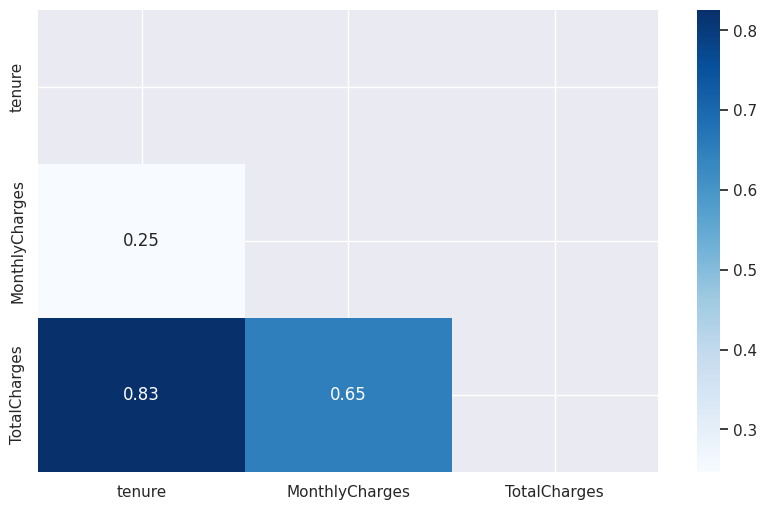

In [32]:
corr = df[num_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(rc={'figure.figsize': (10, 6)})
sns.heatmap(corr,mask = mask, cmap="Blues", annot=True, fmt=".2f")
plt.show()

In [33]:
def missing_values_table(dataframe, na_name=False):
    # Identify columns with missing values.
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    # Count missing values and calculate their percentage.
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    # Create a summary table.
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    # Optionally return the names of columns with missing values.
    if na_name:
        return na_columns

In [34]:
na_columns = missing_values_table(df, na_name=True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


In [35]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [36]:
for col in df[num_cols].columns:
    print(col, check_outlier(df, col))

tenure False
MonthlyCharges False
TotalCharges False


In [37]:
df.columns = [col.upper() for col in df.columns]

df.head()

GENDER  SENIORCITIZEN PARTNER DEPENDENTS  TENURE PHONESERVICE  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MULTIPLELINES INTERNETSERVICE ONLINESECURITY ONLINEBACKUP  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DEVICEPROTECTION TECHSUPPORT STREAMINGTV STREAMINGMOVIES        CONTRACT  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PAPERLESSBILLING              PAYMENTMETHOD  MONTHLYCHARGES  TOTALCHARGES  \
0              Yes           Electronic check          29.850        29.850   
1               No               Mailed check          56.950      1889.500   
2              Yes               Mailed check          53.850       108.150   
3               No  Bank transfer (automatic)          42.300      1840.750   
4              Yes           Electronic check          70.700       151.650   

  CHURN  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [38]:
# Total Additional Services
df['TOTAL_ADDITIONAL_SERVICES'] = (df[['PHONESERVICE', 'INTERNETSERVICE', 'ONLINESECURITY',
                                       'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT',
                                       'STREAMINGTV', 'STREAMINGMOVIES']]== 'Yes').sum(axis=1)


df["NEW_AVG_CHARGES"] = df["TOTALCHARGES"] / (df["TENURE"] + 1)
df["NEW_ENGAGED"] = df["CONTRACT"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)
df['HAS_PHONE_SERVICE'] = df['PHONESERVICE'].apply(lambda x: 1 if x == "Yes" else 0)
df['HAS_INTERNET_SERVICE'] = df['INTERNETSERVICE'].apply(lambda x: 0 if x == "No" else 1)
df["NEW_NOPROT"] = df.apply(lambda x: 1 if (x["ONLINEBACKUP"] != "Yes") or (x["DEVICEPROTECTION"] != "Yes") or (x["TECHSUPPORT"] != "Yes") else 0, axis=1)
df["NEW_YOUNG_NOT_ENGAGED"] = df.apply(lambda x: 1 if (x["NEW_ENGAGED"] == 0) and (x["SENIORCITIZEN"] == 0) else 0, axis=1)
df["NEW_INCREASE"] = df["NEW_AVG_CHARGES"] / df["MONTHLYCHARGES"]
df["NEW_AVG_SERVICE_FEE"] = df["MONTHLYCHARGES"] / (df['TOTAL_ADDITIONAL_SERVICES'] + 1)

# Tenure Group
#df['TENURE_GROUP'] = pd.cut(df['TENURE'], bins=[1, 12, 36, float('inf')], labels=['New', 'Intermediate', 'Loyal'])
df.loc[(df["TENURE"]>=0) & (df["TENURE"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["TENURE"]>12) & (df["TENURE"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["TENURE"]>24) & (df["TENURE"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["TENURE"]>36) & (df["TENURE"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["TENURE"]>48) & (df["TENURE"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["TENURE"]>60) & (df["TENURE"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"

# Service Type
def service_type(row):
    if row['PHONESERVICE'] == 1 and row['HAS_INTERNET_SERVICE'] == 0:
        return 'Phone Only'
    elif row['PHONESERVICE'] == 0 and row['HAS_INTERNET_SERVICE'] == 1:
        return 'Internet Only'
    elif row['PHONESERVICE'] == 1 and row['HAS_INTERNET_SERVICE'] == 1:
        return 'Phone and Internet'
    else:
        return 'No Service'
    
df['SERVICE_TYPE'] = df.apply(service_type, axis=1)

df["NEW_FLAG_ANY_STREAMING"] = df.apply(lambda x: 1 if (x["STREAMINGTV"] == "Yes") or (x["STREAMINGMOVIES"] == "Yes") else 0, axis=1)
df["NEW_FLAG_AUTOPAYMENT"] = df["PAYMENTMETHOD"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)


# Dependents Status
def dependents_status(row):
    if row['SENIORCITIZEN'] == 1 and row['DEPENDENTS'] == 1:
        return 'Senior with Dependents'
    elif row['SENIORCITIZEN'] == 1 and row['DEPENDENTS'] == 0:
        return 'Senior without Dependents'
    elif row['SENIORCITIZEN'] == 0 and row['DEPENDENTS'] == 1:
        return 'Not Senior with Dependents'
    else:
        return 'Not Senior without Dependents'

df['DEPENDENTS_STATUS'] = df.apply(dependents_status, axis=1)

df['TOTAL_SERVICES'] = df['HAS_PHONE_SERVICE'] + df['HAS_INTERNET_SERVICE'] + df['TOTAL_ADDITIONAL_SERVICES']


In [39]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7032
Variables: 35
cat_cols: 29
num_cols: 6
cat_but_car: 0
num_but_cat: 10


In [40]:
df.head()

GENDER  SENIORCITIZEN PARTNER DEPENDENTS  TENURE PHONESERVICE  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MULTIPLELINES INTERNETSERVICE ONLINESECURITY ONLINEBACKUP  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DEVICEPROTECTION TECHSUPPORT STREAMINGTV STREAMINGMOVIES        CONTRACT  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PAPERLESSBILLING              PAYMENTMETHOD  MONTHLYCHARGES  TOTALCHARGES  \
0              Yes           Electronic check          29.850        29.850   
1               No               Mailed check          56.950      1889.500   
2              Yes               Mailed check          53.850       108.150   
3               No  Bank transfer (automatic)          42.300      1840.750   
4              Yes           Electronic check          70.700       151.650   

  CHURN  TOTAL_ADDITIONAL_SERVICES  NEW_AVG_CHARGES  NEW_ENGAGED  \
0    No                          1           14.925            0   
1    No                          3           53.986            1   
2   Yes                          3           36.050            0   
3    No                          3           40.016            1   
4   Yes                          1           50.550            0   

   HAS_PHONE_SERVICE  HAS_INTERNET_SERVICE  NEW_NOPROT  NEW_YOUNG_NOT_ENGAGED  \
0                  0                     1           1                      1   
1                  1                     1           1                      0   
2                  1                     1           1                      1   
3                  0                     1           1                      0   
4                  1                     1           1                      1   

   NEW_INCREASE  NEW_AVG_SERVICE_FEE NEW_TENURE_YEAR SERVICE_TYPE  \
0         0.500               14.925        0-1 Year   No Service   
1         0.948               14.238        2-3 Year   No Service   
2         0.669               13.463        0-1 Year   No Service   
3         0.946               10.575        3-4 Year   No Service   
4         0.715               35.350        0-1 Year   No Service   

   NEW_FLAG_ANY_STREAMING  NEW_FLAG_AUTOPAYMENT  \
0                       0                     0   
1                       0                     0   
2                       0                     0   
3                       0                     1   
4                       0                     0   

               DEPENDENTS_STATUS  TOTAL_SERVICES  
0  Not Senior without Dependents               2  
1  Not Senior without Dependents               5  
2  Not Senior without Dependents               5  
3  Not Senior without Dependents               4  
4  Not Senior without Dependents               3

In [41]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

for col in binary_cols:
    df = label_encoder(df, col)

In [42]:
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TotalServices"]]
cat_cols

['MULTIPLELINES',
 'INTERNETSERVICE',
 'ONLINESECURITY',
 'ONLINEBACKUP',
 'DEVICEPROTECTION',
 'TECHSUPPORT',
 'STREAMINGTV',
 'STREAMINGMOVIES',
 'CONTRACT',
 'PAYMENTMETHOD',
 'NEW_TENURE_YEAR',
 'SERVICE_TYPE',
 'DEPENDENTS_STATUS',
 'SENIORCITIZEN',
 'TOTAL_ADDITIONAL_SERVICES',
 'NEW_ENGAGED',
 'HAS_PHONE_SERVICE',
 'HAS_INTERNET_SERVICE',
 'NEW_NOPROT',
 'NEW_YOUNG_NOT_ENGAGED',
 'NEW_FLAG_ANY_STREAMING',
 'NEW_FLAG_AUTOPAYMENT',
 'TOTAL_SERVICES']

In [43]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first, dtype = int)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

In [44]:
df.head()

GENDER  PARTNER  DEPENDENTS  TENURE  PHONESERVICE  PAPERLESSBILLING  \
0       0        1           0       1             0                 1   
1       1        0           0      34             1                 0   
2       1        0           0       2             1                 1   
3       1        0           0      45             0                 0   
4       0        0           0       2             1                 1   

   MONTHLYCHARGES  TOTALCHARGES  CHURN  NEW_AVG_CHARGES  NEW_INCREASE  \
0          29.850        29.850      0           14.925         0.500   
1          56.950      1889.500      0           53.986         0.948   
2          53.850       108.150      1           36.050         0.669   
3          42.300      1840.750      0           40.016         0.946   
4          70.700       151.650      1           50.550         0.715   

   NEW_AVG_SERVICE_FEE  MULTIPLELINES_No phone service  MULTIPLELINES_Yes  \
0               14.925                               1                  0   
1               14.238                               0                  0   
2               13.463                               0                  0   
3               10.575                               1                  0   
4               35.350                               0                  0   

   INTERNETSERVICE_Fiber optic  INTERNETSERVICE_No  \
0                            0                   0   
1                            0                   0   
2                            0                   0   
3                            0                   0   
4                            1                   0   

   ONLINESECURITY_No internet service  ONLINESECURITY_Yes  \
0                                   0                   0   
1                                   0                   1   
2                                   0                   1   
3                                   0                   1   
4                                   0                   0   

   ONLINEBACKUP_No internet service  ONLINEBACKUP_Yes  \
0                                 0                 1   
1                                 0                 0   
2                                 0                 1   
3                                 0                 0   
4                                 0                 0   

   DEVICEPROTECTION_No internet service  DEVICEPROTECTION_Yes  \
0                                     0                     0   
1                                     0                     1   
2                                     0                     0   
3                                     0                     1   
4                                     0                     0   

   TECHSUPPORT_No internet service  TECHSUPPORT_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                1   
4                                0                0   

   STREAMINGTV_No internet service  STREAMINGTV_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                0   
4                                0                0   

   STREAMINGMOVIES_No internet service  STREAMINGMOVIES_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   CONTRACT_One year  CONTRACT_Two year  \
0                  0                  0   
1                  1                  0   
2                  0                  0   
3                

In [45]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

GENDER  PARTNER  DEPENDENTS  TENURE  PHONESERVICE  PAPERLESSBILLING  \
0       0        1           0  -1.280             0                 1   
1       1        0           0   0.064             1                 0   
2       1        0           0  -1.240             1                 1   
3       1        0           0   0.512             0                 0   
4       0        0           0  -1.240             1                 1   

   MONTHLYCHARGES  TOTALCHARGES  CHURN  NEW_AVG_CHARGES  NEW_INCREASE  \
0          -1.162        -0.994      0           -1.447        -2.663   
1          -0.261        -0.174      0           -0.167         0.329   
2          -0.364        -0.960      1           -0.755        -1.531   
3          -0.748        -0.195      0           -0.625         0.316   
4           0.196        -0.940      1           -0.280        -1.227   

   NEW_AVG_SERVICE_FEE  MULTIPLELINES_No phone service  MULTIPLELINES_Yes  \
0               -0.313                               1                  0   
1               -0.412                               0                  0   
2               -0.523                               0                  0   
3               -0.940                               1                  0   
4                2.634                               0                  0   

   INTERNETSERVICE_Fiber optic  INTERNETSERVICE_No  \
0                            0                   0   
1                            0                   0   
2                            0                   0   
3                            0                   0   
4                            1                   0   

   ONLINESECURITY_No internet service  ONLINESECURITY_Yes  \
0                                   0                   0   
1                                   0                   1   
2                                   0                   1   
3                                   0                   1   
4                                   0                   0   

   ONLINEBACKUP_No internet service  ONLINEBACKUP_Yes  \
0                                 0                 1   
1                                 0                 0   
2                                 0                 1   
3                                 0                 0   
4                                 0                 0   

   DEVICEPROTECTION_No internet service  DEVICEPROTECTION_Yes  \
0                                     0                     0   
1                                     0                     1   
2                                     0                     0   
3                                     0                     1   
4                                     0                     0   

   TECHSUPPORT_No internet service  TECHSUPPORT_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                1   
4                                0                0   

   STREAMINGTV_No internet service  STREAMINGTV_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                0   
4                                0                0   

   STREAMINGMOVIES_No internet service  STREAMINGMOVIES_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   CONTRACT_One year  CONTRACT_Two year  \
0                  0                  0   
1                  1                  0   
2                  0                  0   
3                

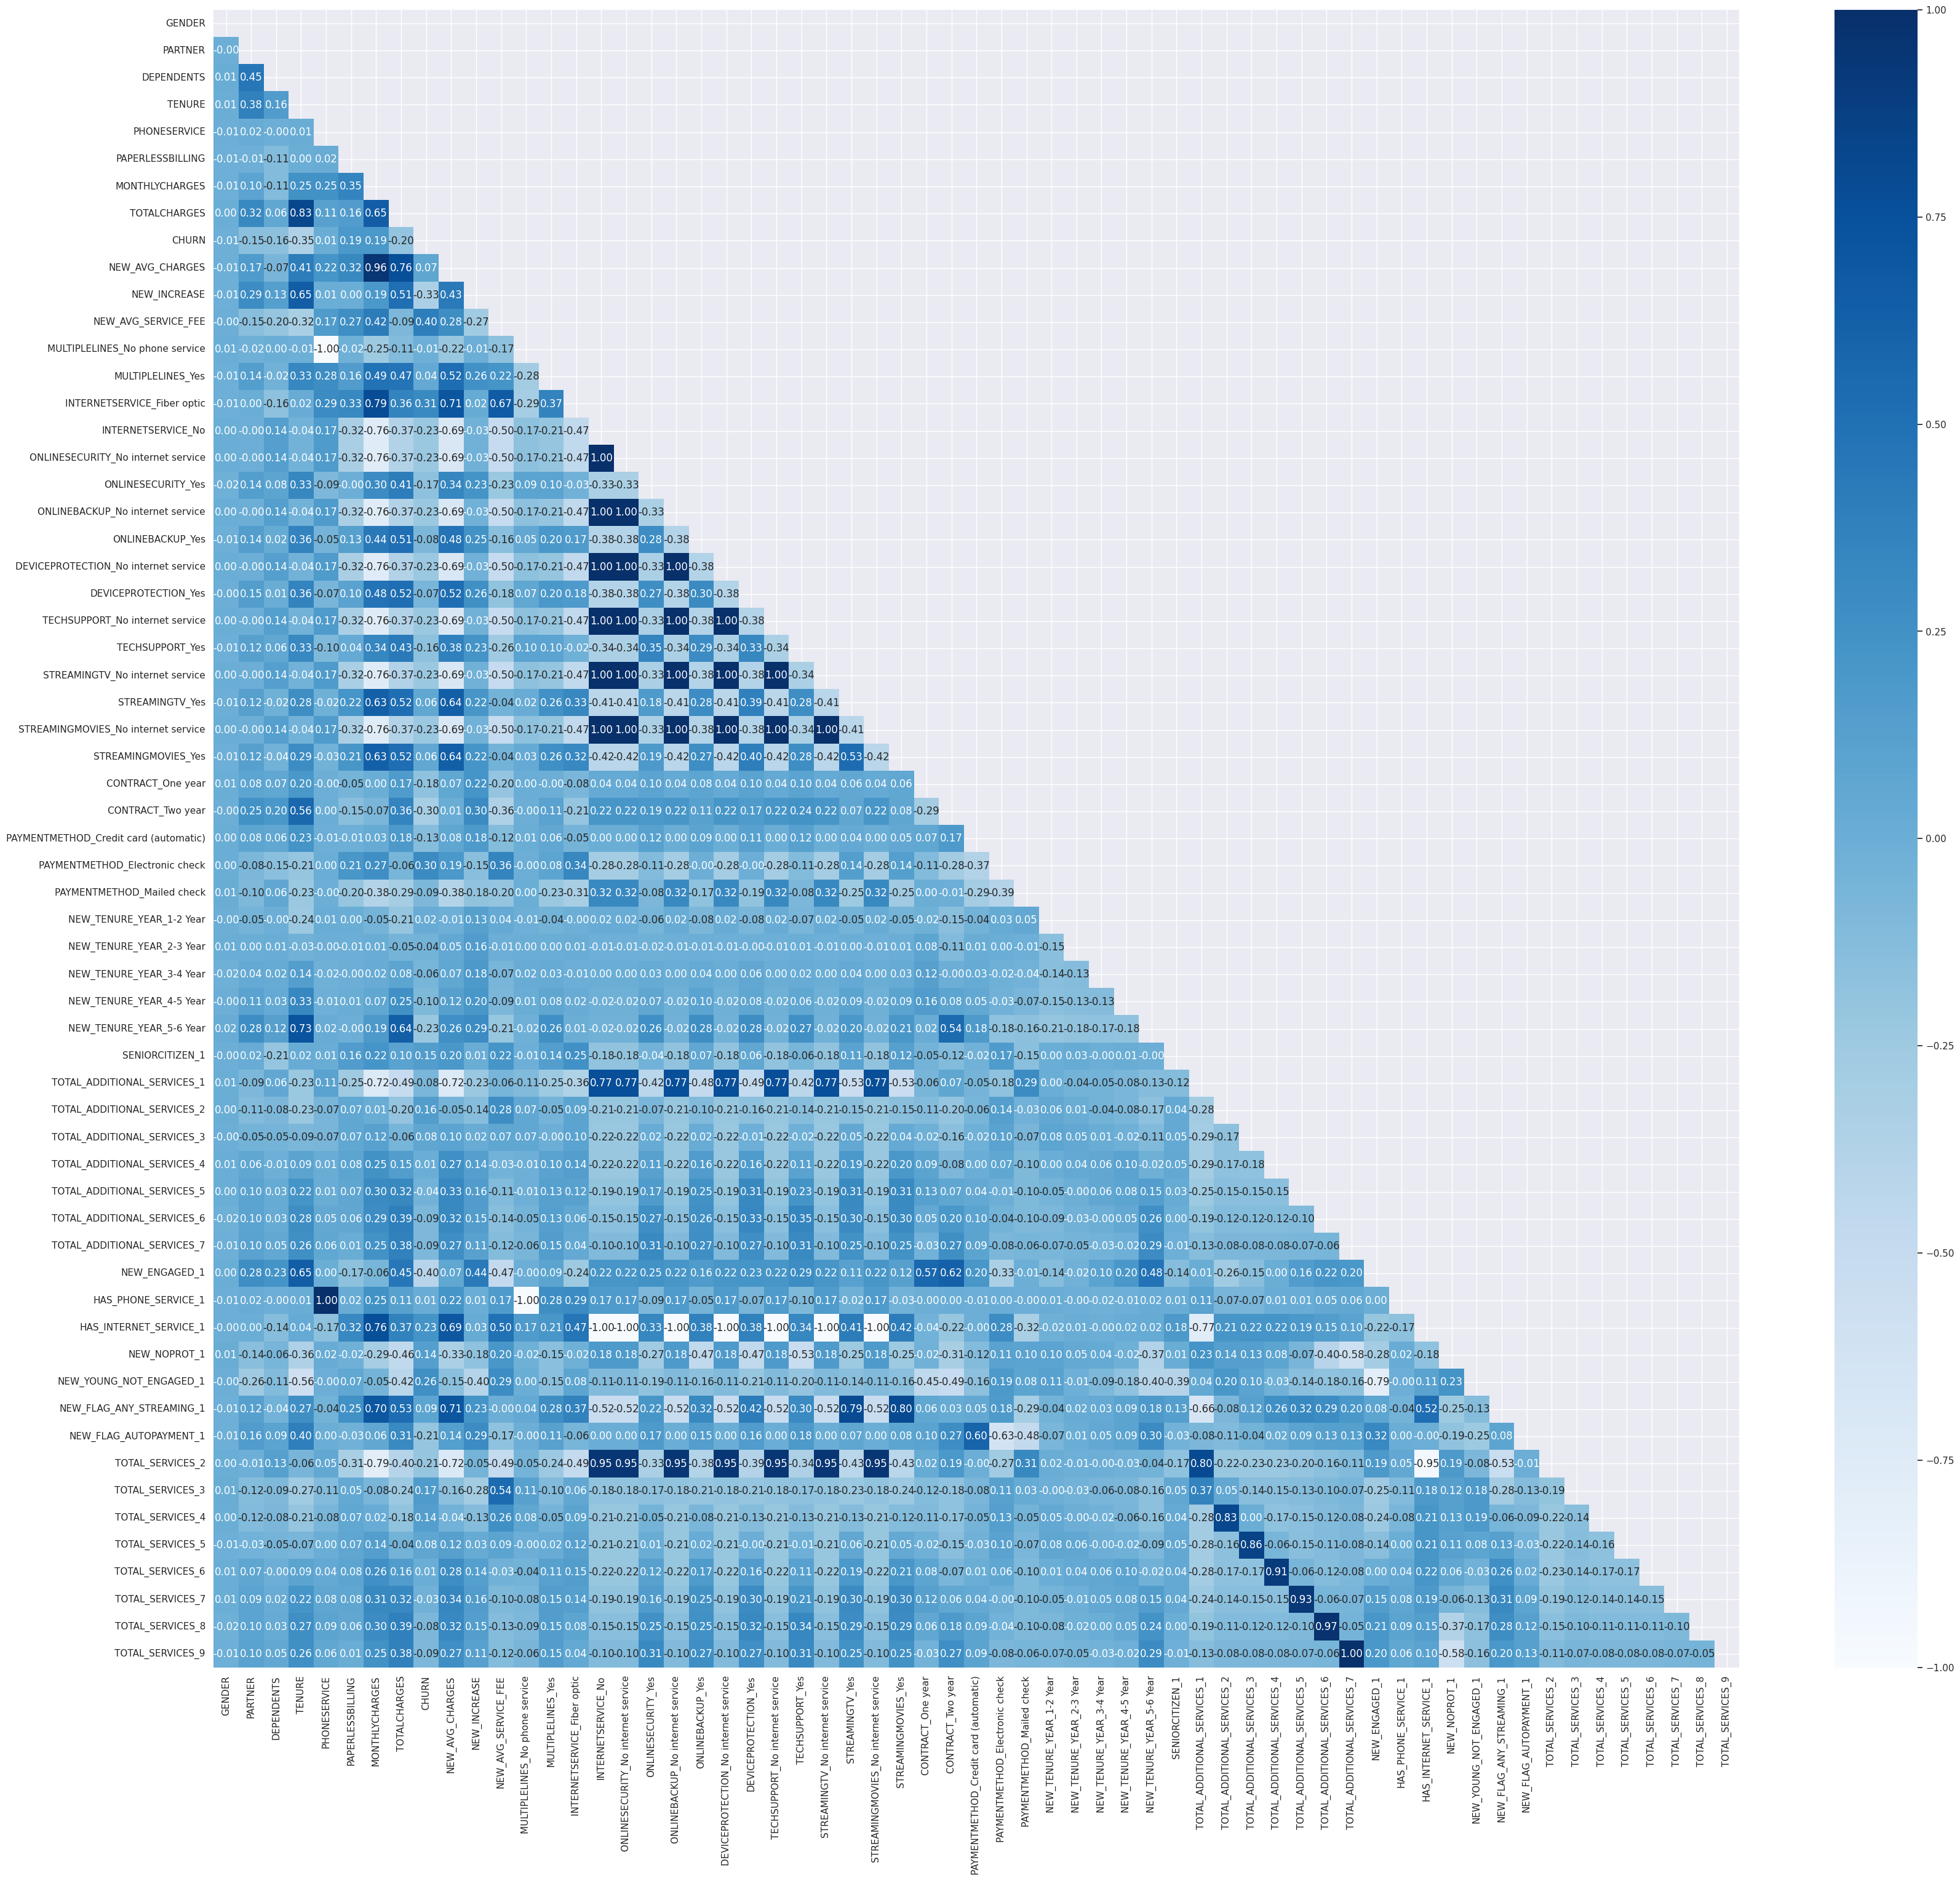

In [46]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(40,35))
sns.heatmap(corr,mask = mask, cmap="Blues", annot=True, fmt=".2f")
plt.show()

In [47]:
df.columns

Index(['GENDER', 'PARTNER', 'DEPENDENTS', 'TENURE', 'PHONESERVICE',
       'PAPERLESSBILLING', 'MONTHLYCHARGES', 'TOTALCHARGES', 'CHURN',
       'NEW_AVG_CHARGES', 'NEW_INCREASE', 'NEW_AVG_SERVICE_FEE',
       'MULTIPLELINES_No phone service', 'MULTIPLELINES_Yes',
       'INTERNETSERVICE_Fiber optic', 'INTERNETSERVICE_No',
       'ONLINESECURITY_No internet service', 'ONLINESECURITY_Yes',
       'ONLINEBACKUP_No internet service', 'ONLINEBACKUP_Yes',
       'DEVICEPROTECTION_No internet service', 'DEVICEPROTECTION_Yes',
       'TECHSUPPORT_No internet service', 'TECHSUPPORT_Yes',
       'STREAMINGTV_No internet service', 'STREAMINGTV_Yes',
       'STREAMINGMOVIES_No internet service', 'STREAMINGMOVIES_Yes',
       'CONTRACT_One year', 'CONTRACT_Two year',
       'PAYMENTMETHOD_Credit card (automatic)',
       'PAYMENTMETHOD_Electronic check', 'PAYMENTMETHOD_Mailed check',
       'NEW_TENURE_YEAR_1-2 Year', 'NEW_TENURE_YEAR_2-3 Year',
       'NEW_TENURE_YEAR_3-4 Year', 'NEW_TENURE_YEAR_

In [48]:
df.shape

(7032, 61)

In [49]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7032
Variables: 61
cat_cols: 55
num_cols: 6
cat_but_car: 0
num_but_cat: 55


count   7032.000
mean      -0.000
std        1.000
min       -1.280
5%        -1.280
10%       -1.240
20%       -1.077
30%       -0.832
40%       -0.506
50%       -0.139
60%        0.309
70%        0.716
80%        1.156
90%        1.490
95%        1.613
99%        1.613
max        1.613
Name: TENURE, dtype: float64


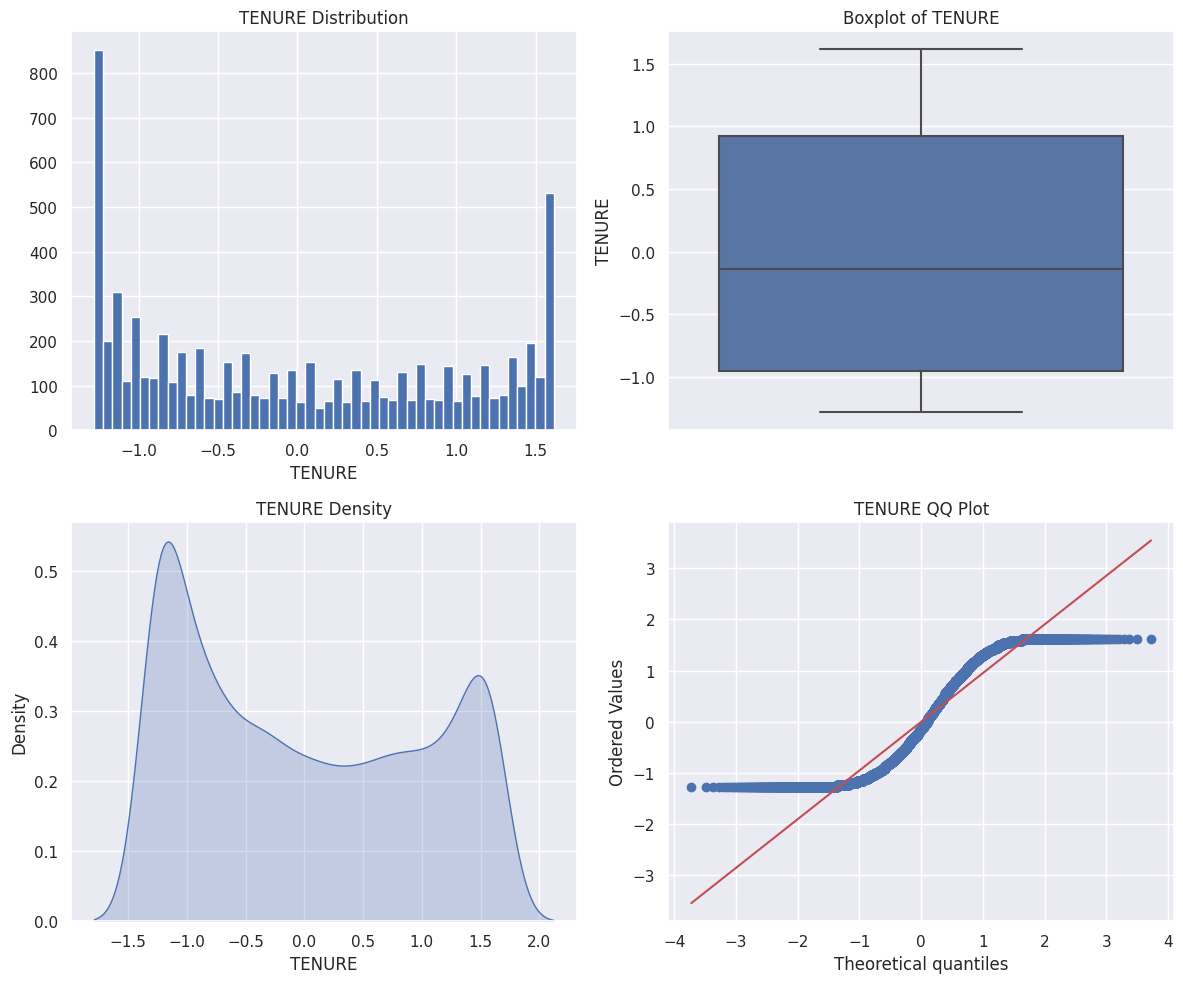

#####################################
count   7032.000
mean       0.000
std        1.000
min       -1.547
5%        -1.501
10%       -1.487
20%       -1.321
30%       -0.628
40%       -0.195
50%        0.185
60%        0.477
70%        0.689
80%        0.981
90%        1.258
95%        1.417
99%        1.660
max        1.793
Name: MONTHLYCHARGES, dtype: float64


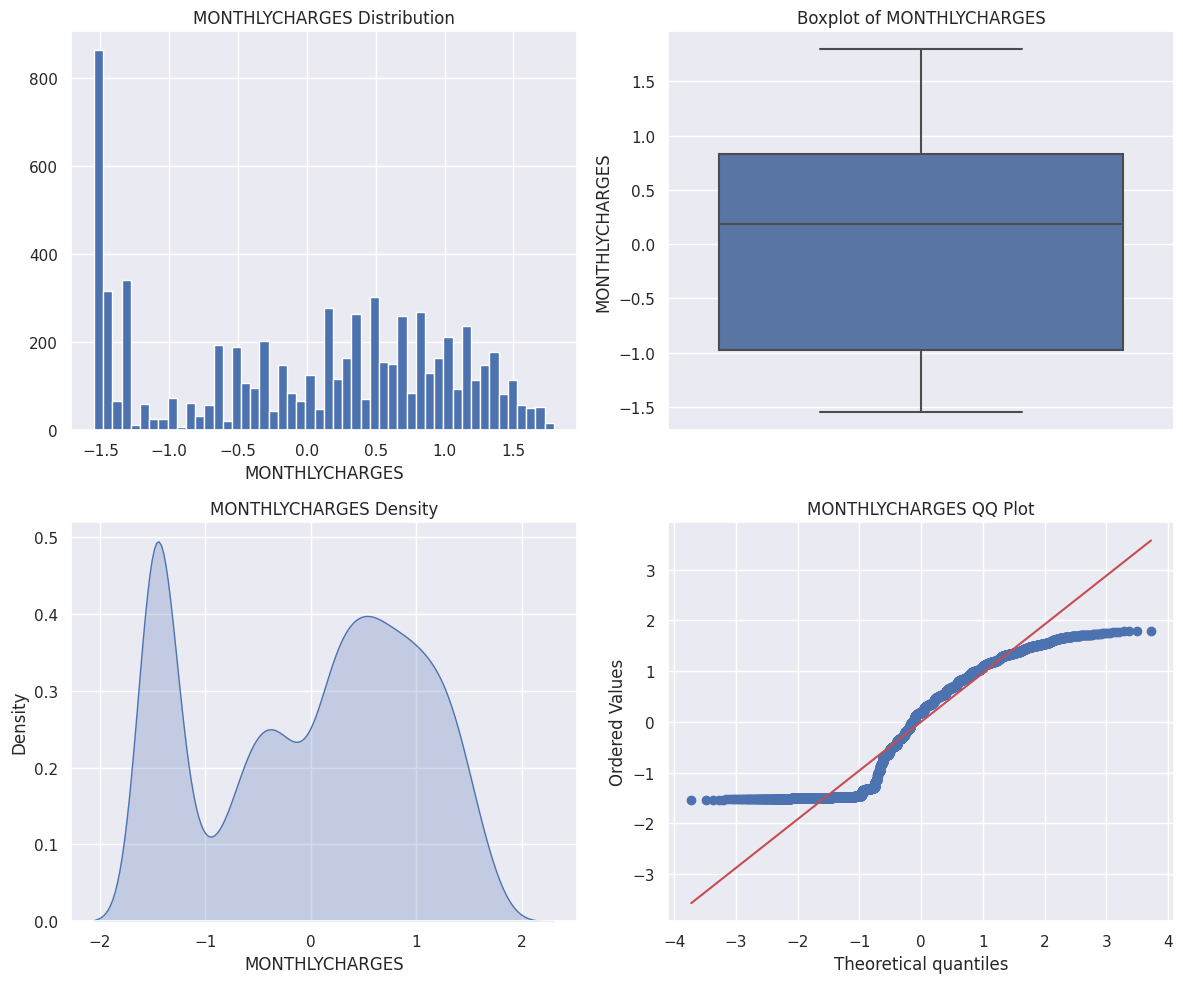

#####################################
count   7032.000
mean      -0.000
std        1.000
min       -0.999
5%        -0.985
10%       -0.970
20%       -0.890
30%       -0.764
40%       -0.591
50%       -0.391
60%       -0.103
70%        0.378
80%        0.967
90%        1.629
95%        2.047
99%        2.540
max        2.824
Name: TOTALCHARGES, dtype: float64


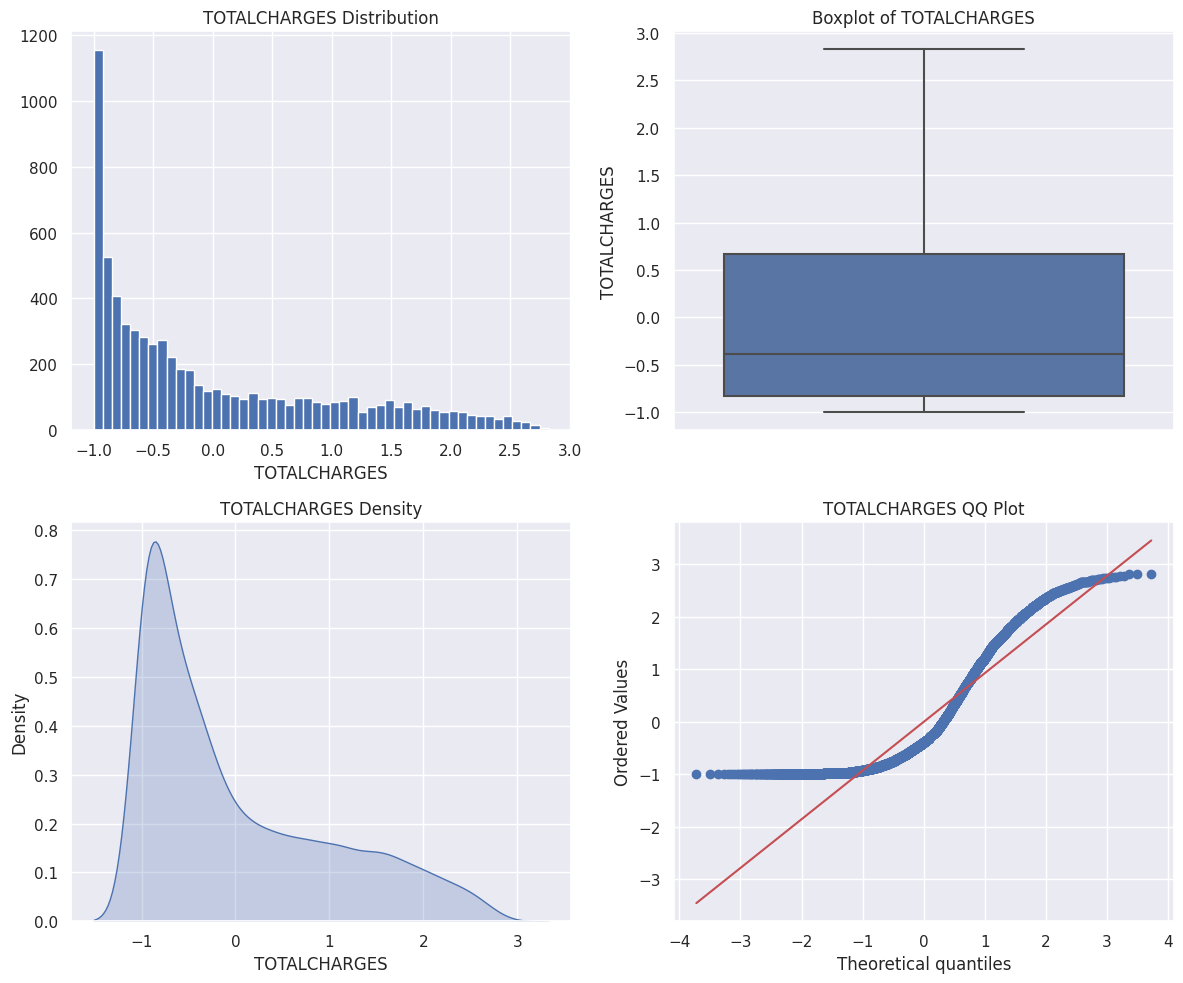

#####################################
count   7032.000
mean      -0.000
std        1.000
min       -1.635
5%        -1.405
10%       -1.319
20%       -1.183
30%       -0.757
40%       -0.309
50%        0.065
60%        0.403
70%        0.707
80%        1.010
90%        1.345
95%        1.525
99%        1.763
max        1.963
Name: NEW_AVG_CHARGES, dtype: float64


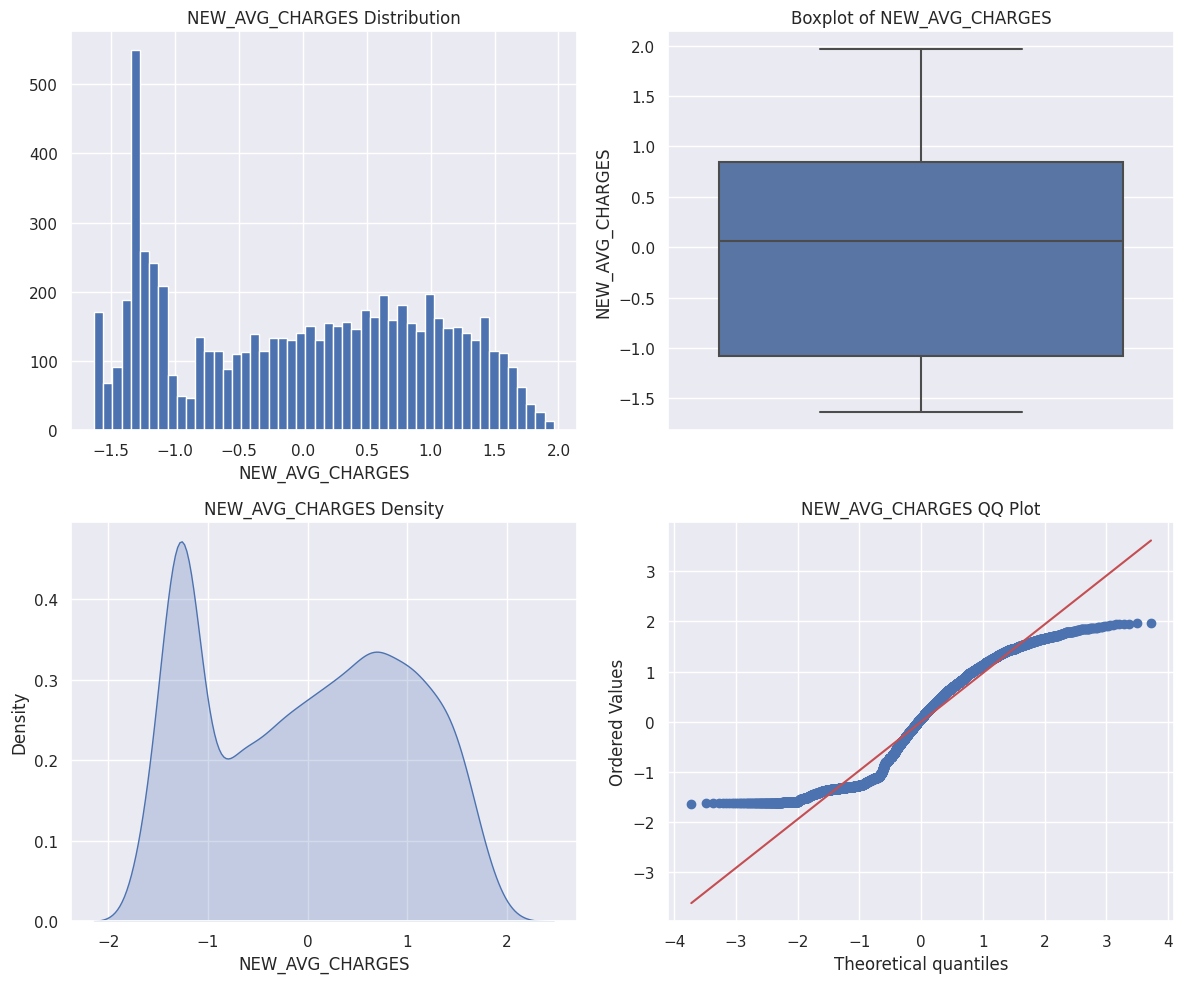

#####################################
count   7032.000
mean       0.000
std        1.000
min       -2.857
5%        -2.663
10%       -1.791
20%       -0.382
30%        0.083
40%        0.284
50%        0.401
60%        0.488
70%        0.556
80%        0.626
90%        0.719
95%        0.801
99%        1.063
max        1.985
Name: NEW_INCREASE, dtype: float64


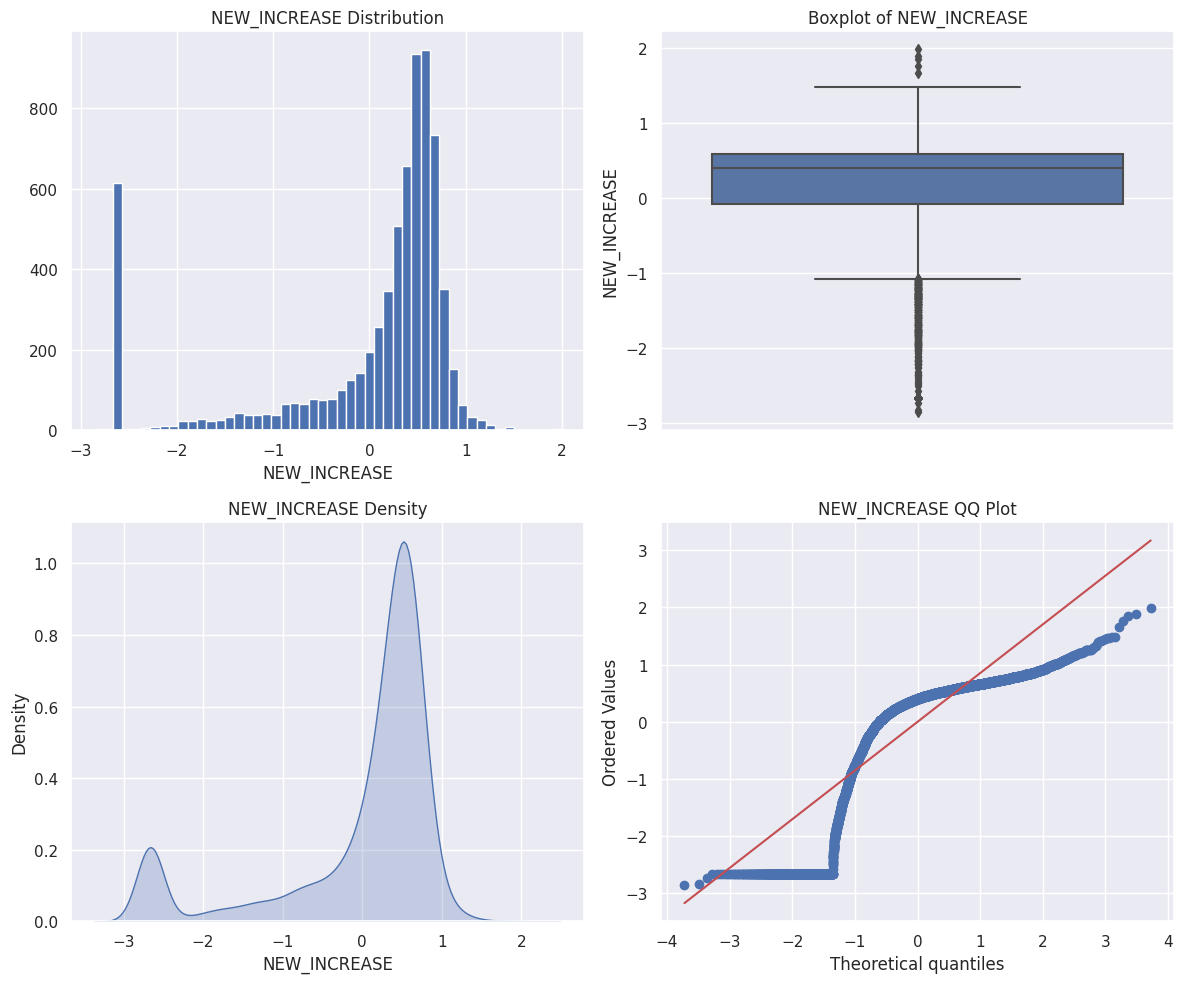

#####################################
count   7032.000
mean       0.000
std        1.000
min       -1.218
5%        -1.055
10%       -1.027
20%       -0.926
30%       -0.702
40%       -0.507
50%       -0.230
60%        0.035
70%        0.313
80%        0.771
90%        1.364
95%        2.551
99%        2.950
max        3.153
Name: NEW_AVG_SERVICE_FEE, dtype: float64


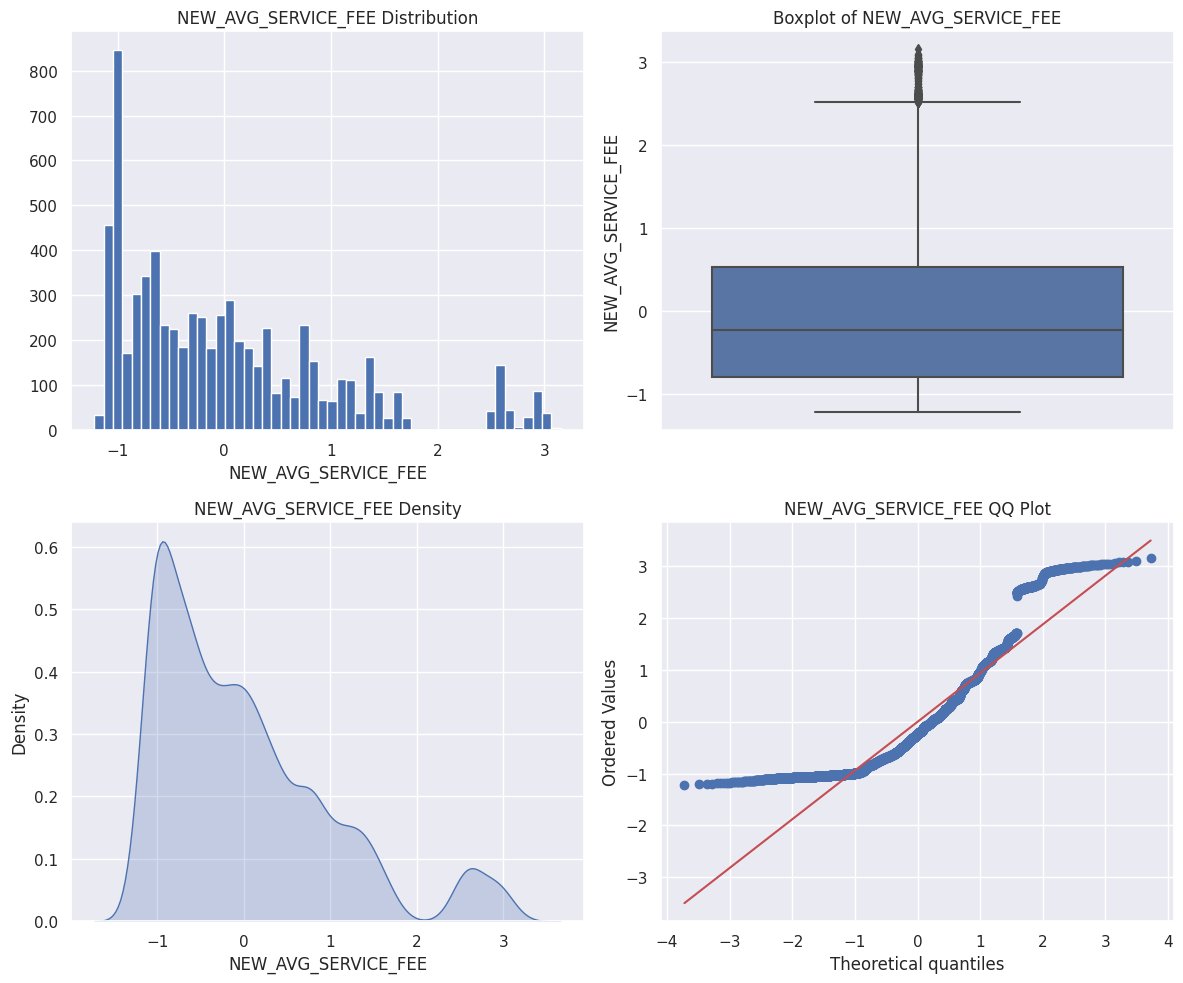

#####################################


In [50]:
for col in num_cols:
    num_summary(df, col, plot=True)

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #3383; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> ML MODELLING </div>

In [51]:
y = df["CHURN"]
X = df.drop("CHURN", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.25, random_state=42)

rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [52]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall: {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1: {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy: 0.79
Recall: 0.62
Precision: 0.51
F1: 0.56
Auc: 0.73


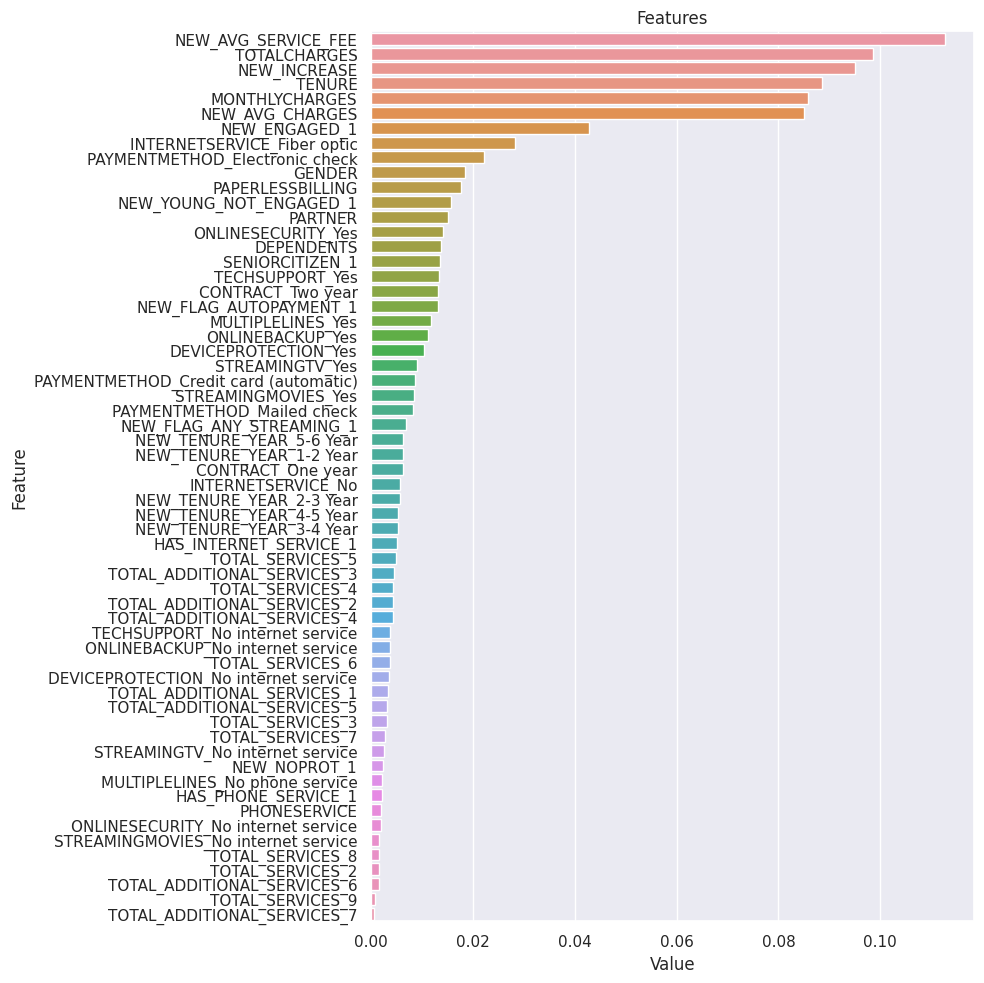

In [53]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X)

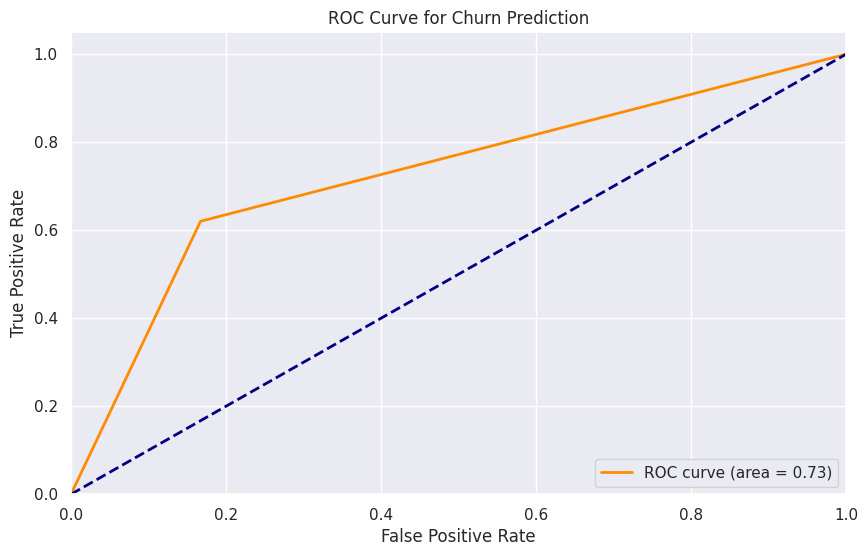

In [54]:
fpr, tpr, thresholds = roc_curve(y_pred, y_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' %  roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Churn Prediction')
plt.legend(loc="lower right")
plt.show()

In [55]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier(n_estimators=200)),
          ('SVC', SVC()),
          ('GBM', GradientBoostingClassifier(n_estimators=200, learning_rate=0.06)),
          ("XGBoost", XGBClassifier(learning_rate=0.06)),
          ("LightGBM", LGBMClassifier(learning_rate=0.06, verbose=-1)),
          ("CatBoost", CatBoostClassifier(learning_rate=0.06,verbose=False))]

In [56]:
acclist=[]
for name, model in models:
    acc = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy"))
    acclist.append([name,acc])
    print(f"ACC: {round(acc, 4)} ({name}) ")

ACC: 0.8041 (LR) 
ACC: 0.7662 (KNN) 
ACC: 0.7285 (CART) 
ACC: 0.7914 (RF) 
ACC: 0.8024 (SVC) 
ACC: 0.7992 (GBM) 
ACC: 0.7929 (XGBoost) 
ACC: 0.7947 (LightGBM) 
ACC: 0.7876 (CatBoost) 


In [57]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)

gbm_accuracy=round(accuracy_score(y_test,y_pred), 4)*100
gbm_accuracy

78.67

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1291
           1       0.62      0.51      0.56       467

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758



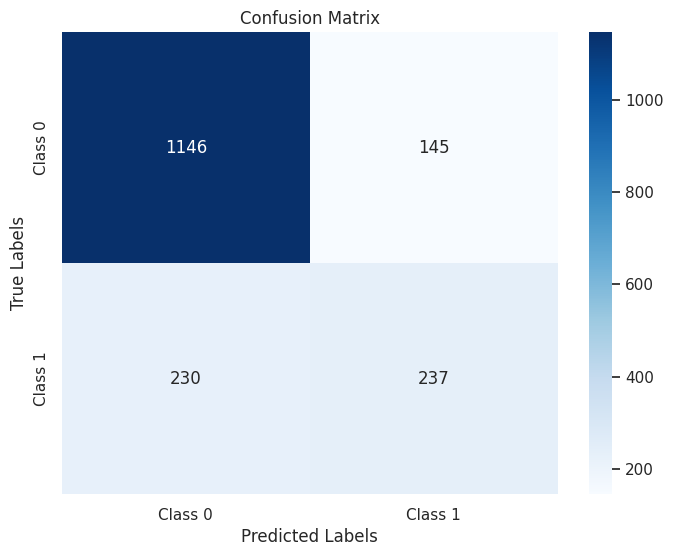

In [59]:
cm = confusion_matrix(y_test, y_pred)

class_labels = ['Class 0', 'Class 1']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [60]:
"""lgb_model = LGBMClassifier(verbose=-1, random_state=42)
lgb_params = {
    "learning_rate": [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1],
    "n_estimators": [100, 200, 400, 500, 800, 1000, 1500],
    "depth": [4, 6, 8, 10],
    "l2_leaf_reg": [1, 3, 5, 7, 9]}
lgb_random_search = RandomizedSearchCV(lgb_model,
                                        lgb_params,
                                        cv=3,
                                        n_jobs=-1,
                                        verbose=1,
                                        random_state=42,
                                        scoring='accuracy').fit(X_train, y_train)"""

'lgb_model = LGBMClassifier(verbose=-1, random_state=42)\nlgb_params = {\n    "learning_rate": [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1],\n    "n_estimators": [100, 200, 400, 500, 800, 1000, 1500],\n    "depth": [4, 6, 8, 10],\n    "l2_leaf_reg": [1, 3, 5, 7, 9]}\nlgb_random_search = RandomizedSearchCV(lgb_model,\n                                        lgb_params,\n                                        cv=3,\n                                        n_jobs=-1,\n                                        verbose=1,\n                                        random_state=42,\n                                        scoring=\'accuracy\').fit(X_train, y_train)'

In [61]:
"""print("Best parameters:", lgb_random_search.best_params_)
print("Best Scores:", lgb_random_search.best_score_)"""

'print("Best parameters:", lgb_random_search.best_params_)\nprint("Best Scores:", lgb_random_search.best_score_)'

In [62]:
"""best_model = lgb_random_search.best_estimator_
y_pred_lgb = best_model.predict(X_test)

lgb_accuracy=round(accuracy_score(y_test,y_pred_lgb), 4)*100
lgb_accuracy"""

'best_model = lgb_random_search.best_estimator_\ny_pred_lgb = best_model.predict(X_test)\n\nlgb_accuracy=round(accuracy_score(y_test,y_pred_lgb), 4)*100\nlgb_accuracy'

In [63]:
best_params_lgb = {'n_estimators': 400, 'learning_rate': 0.02, 'l2_leaf_reg': 5, 'depth': 4}

In [64]:
best_model = LGBMClassifier(**best_params_lgb, verbose=-1, random_state=42)
best_model.fit(X_train, y_train)
y_pred_lgb = best_model.predict(X_test)

lgb_accuracy = round(accuracy_score(y_test,y_pred_lgb), 4)*100
lgb_accuracy

79.07

In [65]:
print(classification_report(y_test,y_pred_lgb))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1291
           1       0.63      0.53      0.57       467

    accuracy                           0.79      1758
   macro avg       0.73      0.71      0.72      1758
weighted avg       0.78      0.79      0.78      1758



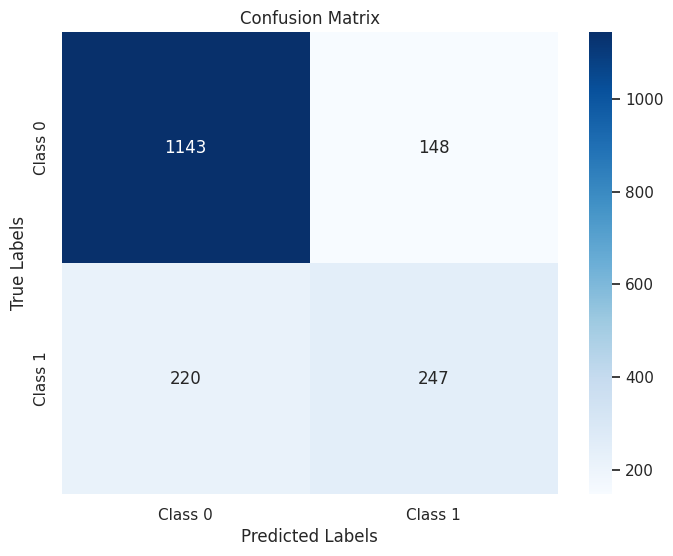

In [66]:
cm = confusion_matrix(y_test, y_pred_lgb)

class_labels = ['Class 0', 'Class 1']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [67]:
"""rf_model = RandomForestClassifier(verbose=False, random_state=42)
rf_params = {
    "n_estimators": [100, 200, 400, 500, 800, 1000, 1500],
    "max_depth": [4, 6, 8, 10, 12, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"],
    "bootstrap": [True, False]}
rf_random_search = RandomizedSearchCV(rf_model,
                                        rf_params,
                                        cv=3,
                                        n_jobs=-1,
                                        verbose=1,
                                        random_state=42,
                                        scoring='accuracy').fit(X_train, y_train)"""

'rf_model = RandomForestClassifier(verbose=False, random_state=42)\nrf_params = {\n    "n_estimators": [100, 200, 400, 500, 800, 1000, 1500],\n    "max_depth": [4, 6, 8, 10, 12, None],\n    "min_samples_split": [2, 5, 10],\n    "min_samples_leaf": [1, 2, 4],\n    "max_features": ["auto", "sqrt", "log2"],\n    "bootstrap": [True, False]}\nrf_random_search = RandomizedSearchCV(rf_model,\n                                        rf_params,\n                                        cv=3,\n                                        n_jobs=-1,\n                                        verbose=1,\n                                        random_state=42,\n                                        scoring=\'accuracy\').fit(X_train, y_train)'

In [68]:
"""print("Best parameters:", rf_random_search.best_params_)
print("Best Scores:", rf_random_search.best_score_)"""

'print("Best parameters:", rf_random_search.best_params_)\nprint("Best Scores:", rf_random_search.best_score_)'

In [69]:
"""best_model = rf_random_search.best_estimator_
y_pred_rf = best_model.predict(X_test)

lgb_accuracy=round(accuracy_score(y_test,y_pred_rf), 4)*100
lgb_accuracy"""

'best_model = rf_random_search.best_estimator_\ny_pred_rf = best_model.predict(X_test)\n\nlgb_accuracy=round(accuracy_score(y_test,y_pred_rf), 4)*100\nlgb_accuracy'

In [70]:
best_params_rf = {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}

In [71]:
best_model = RandomForestClassifier(**best_params_rf, random_state=42)
best_model.fit(X_train, y_train)
y_pred_rf = best_model.predict(X_test)

rf_accuracy=round(accuracy_score(y_test,y_pred_rf), 4)*100
rf_accuracy

79.35

In [72]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1291
           1       0.65      0.48      0.55       467

    accuracy                           0.79      1758
   macro avg       0.74      0.69      0.71      1758
weighted avg       0.78      0.79      0.78      1758



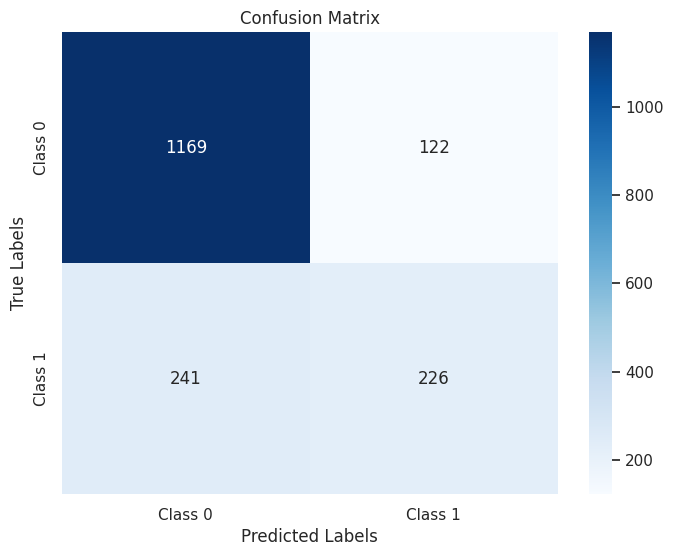

In [73]:
cm = confusion_matrix(y_test, y_pred_rf)

class_labels = ['Class 0', 'Class 1']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [74]:
"""cat_model = CatBoostClassifier(verbose=False, random_state=42)
cat_params = {
    "learning_rate": [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1],
    "n_estimators": [100, 200, 400, 500, 800, 1000, 1500],
    "depth": [4, 6, 8, 10],
    "l2_leaf_reg": [1, 3, 5, 7, 9]}
cat_random_search = RandomizedSearchCV(cat_model,
                                        cat_params,
                                        cv=3,
                                        n_jobs=-1,
                                        verbose=1,
                                        random_state=42,
                                        scoring='accuracy').fit(X_train, y_train)"""

'cat_model = CatBoostClassifier(verbose=False, random_state=42)\ncat_params = {\n    "learning_rate": [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1],\n    "n_estimators": [100, 200, 400, 500, 800, 1000, 1500],\n    "depth": [4, 6, 8, 10],\n    "l2_leaf_reg": [1, 3, 5, 7, 9]}\ncat_random_search = RandomizedSearchCV(cat_model,\n                                        cat_params,\n                                        cv=3,\n                                        n_jobs=-1,\n                                        verbose=1,\n                                        random_state=42,\n                                        scoring=\'accuracy\').fit(X_train, y_train)'

In [75]:
"""print("Best parameters:", cat_random_search.best_params_)
print("Best Scores:", cat_random_search.best_score_)"""

'print("Best parameters:", cat_random_search.best_params_)\nprint("Best Scores:", cat_random_search.best_score_)'

In [76]:
"""best_model = cat_random_search.best_estimator_
y_pred_cat = best_model.predict(X_test)

cat_accuracy=round(accuracy_score(y_test,y_pred_cat), 4)*100
cat_accuracy"""

'best_model = cat_random_search.best_estimator_\ny_pred_cat = best_model.predict(X_test)\n\ncat_accuracy=round(accuracy_score(y_test,y_pred_cat), 4)*100\ncat_accuracy'

In [77]:
best_params_cat = {'n_estimators': 400, 'learning_rate': 0.02, 'l2_leaf_reg': 5, 'depth': 4}

In [78]:
best_model = CatBoostClassifier(**best_params_cat, verbose = False, random_state=42)
best_model.fit(X_train, y_train)
y_pred_cat = best_model.predict(X_test)

cat_accuracy=round(accuracy_score(y_test,y_pred_cat), 4)*100
cat_accuracy

80.38

In [79]:
print(classification_report(y_test,y_pred_cat))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1291
           1       0.67      0.52      0.58       467

    accuracy                           0.80      1758
   macro avg       0.75      0.71      0.73      1758
weighted avg       0.79      0.80      0.80      1758



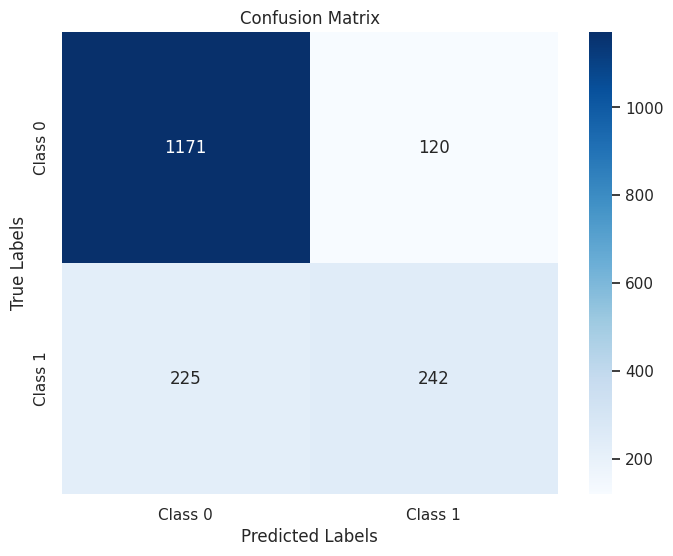

In [80]:
cm = confusion_matrix(y_test, y_pred_cat)

class_labels = ['Class 0', 'Class 1']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #3383; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> ANN </div>

In [81]:
X_train.shape[1]

60

In [82]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, input_shape=(X_train.shape[1],), activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.004)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(256, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(128, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(32, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.003)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(8, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.002)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        31,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199,857 (780.69 KB)

 Trainable params: 199,857 (780.69 KB)

 Non-trainable params: 0 (0.00 B)

In [83]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=100,
                    batch_size=64,
                    callbacks=[early_stopping],
                    verbose=1)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7354 - loss: 1.7533 - val_accuracy: 0.8026 - val_loss: 1.4199
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7763 - loss: 1.3930 - val_accuracy: 0.7986 - val_loss: 1.1696
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7848 - loss: 1.1325 - val_accuracy: 0.7753 - val_loss: 0.9991
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7891 - loss: 0.9515 - val_accuracy: 0.8026 - val_loss: 0.8177
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7806 - loss: 0.8235 - val_accuracy: 0.7964 - val_loss: 0.7148
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7976 - loss: 0.7138 - val_accuracy: 0.7918 - val_loss: 0.6371
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7865 - loss: 0.6401 - val_accuracy: 0.7856 - val_loss: 0.5842
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8022 - loss: 0.5773 - val_accuracy: 0.8026 - 

In [84]:
loss_and_metrics = model.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8007 - loss: 0.4386
[0.43518683314323425, 0.8014789819717407]
Loss =  0.43518683314323425
Accuracy =  0.8014789819717407


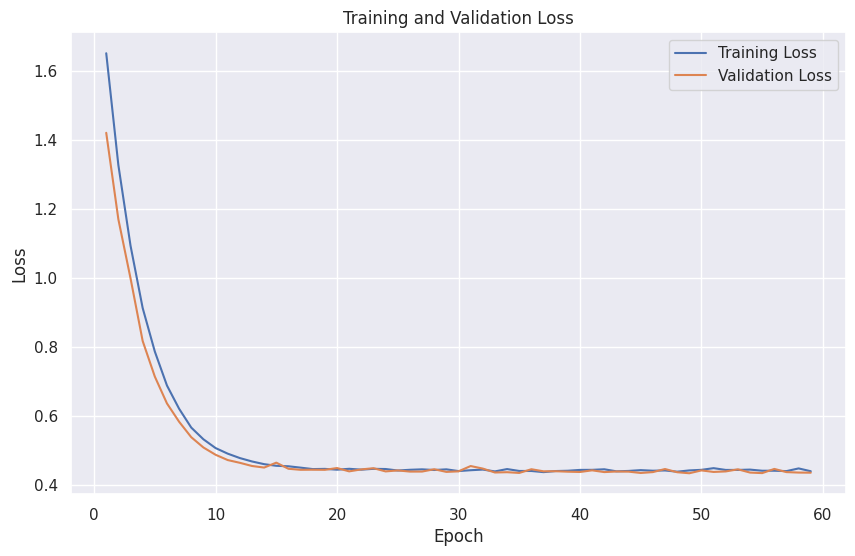

In [85]:
plt.figure(figsize=(10, 6))

train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [86]:
predicted_ann = model.predict(X_test)
predicted_ann = tf.squeeze(predicted_ann)
predicted_ann = np.array([1 if x >= 0.5 else 0 for x in predicted_ann])
actual = np.array(y_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [87]:
print(classification_report(y_test,predicted_ann))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1291
           1       0.64      0.57      0.60       467

    accuracy                           0.80      1758
   macro avg       0.75      0.73      0.74      1758
weighted avg       0.80      0.80      0.80      1758



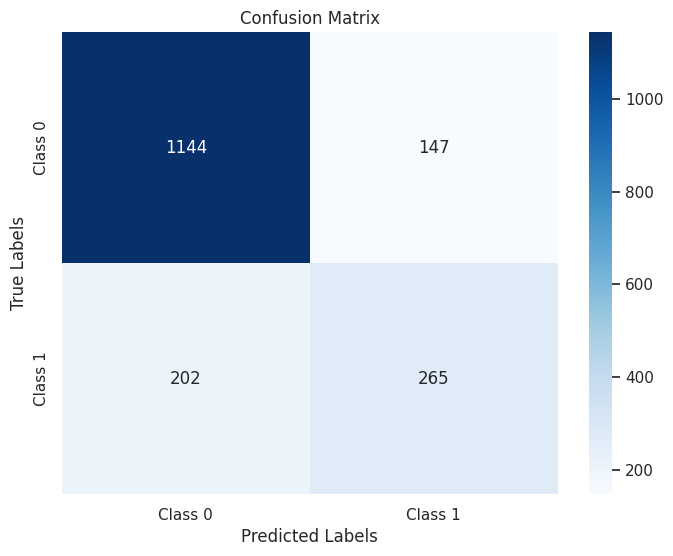

In [88]:
cm = confusion_matrix(y_test, predicted_ann)

class_labels = ['Class 0', 'Class 1']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# <div style="border-radius:10px; border:#5E5772 solid; padding: 12px; background-color: #3383; font-size:100%; font-family:Comic Sans MS; font-family:Comic Sans MS; text-align:center"> LSTM </div>

In [89]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1], 1), activation="tanh", 
                         return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.LSTM(32, activation="tanh", return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.LSTM(16, activation="tanh", kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights=True
)

model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
history_lstm = model_lstm.fit(X_train, y_train,
                              validation_data=(X_test, y_test),
                              epochs=50,
                              batch_size=32,
                              callbacks=[early_stopping],
                              verbose=1)

Epoch 1/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.7319 - loss: 0.6920 - val_accuracy: 0.7332 - val_loss: 0.5846
Epoch 2/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - accuracy: 0.7297 - loss: 0.5837 - val_accuracy: 0.7383 - val_loss: 0.5413
Epoch 3/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.7285 - loss: 0.5492 - val_accuracy: 0.7304 - val_loss: 0.5248
Epoch 4/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.7320 - loss: 0.5352 - val_accuracy: 0.7372 - val_loss: 0.5353
Epoch 5/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.7306 - loss: 0.5288 - val_accuracy: 0.7304 - val_loss: 0.5386
Epoch 6/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.7415 - loss: 0.5202 - val_accuracy: 0.7457 - val_loss: 0.4966
Epoch 7/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.7390 - loss: 0.5114 - val_accuracy: 0.7332 - val_loss: 0.5028
Epoch 8/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 20s 64ms/step - accuracy: 0.7358 - loss: 0.5116 - 

In [91]:
loss_and_metrics = model_lstm.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7929 - loss: 0.4528
[0.4510936141014099, 0.7929465174674988]
Loss =  0.4510936141014099
Accuracy =  0.7929465174674988


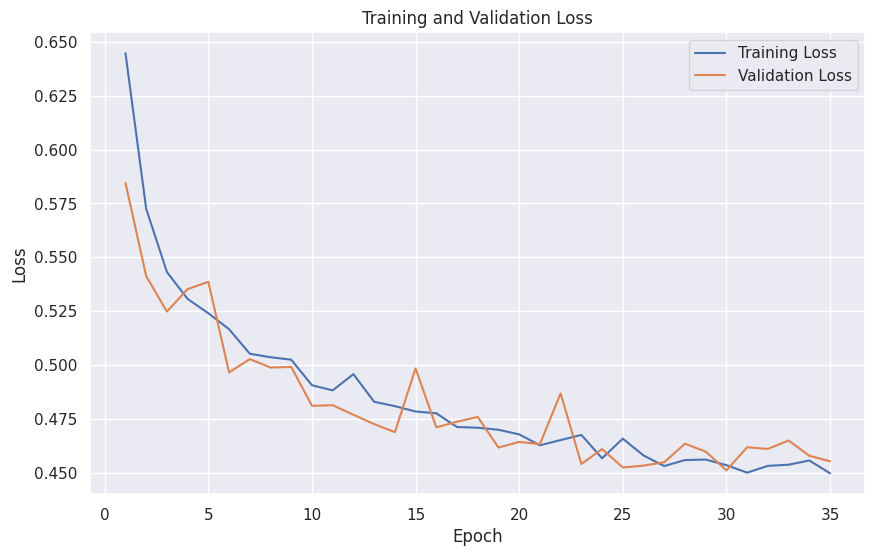

In [92]:
plt.figure(figsize=(10, 6))

train_loss = history_lstm.history['loss']
val_loss = history_lstm.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [93]:
predicted_lstm = model_lstm.predict(X_test)
predicted_lstm = tf.squeeze(predicted_lstm)
predicted_lstm = np.array([1 if x >= 0.5 else 0 for x in predicted_lstm])
actual = np.array(y_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


In [94]:
print(classification_report(y_test,predicted_lstm))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1291
           1       0.67      0.43      0.52       467

    accuracy                           0.79      1758
   macro avg       0.74      0.68      0.70      1758
weighted avg       0.78      0.79      0.78      1758



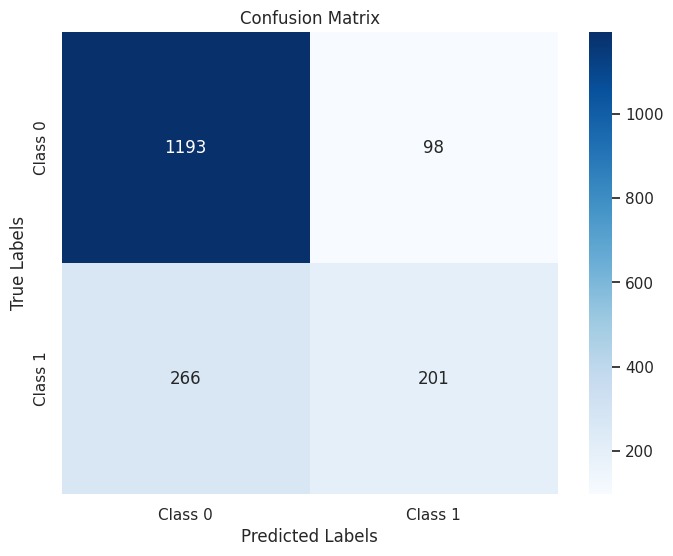

In [95]:
cm = confusion_matrix(y_test, predicted_lstm)

class_labels = ['Class 0', 'Class 1']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()